# Real Estate Property Investments
### Invest with sound, objective data driven recommendations
Syracuse Applied Data Science, IST-707 Data Analytics  

Ryan Timbrook (RTIMBROO)  
DATE: 9/8/2019
ASSIGNMENT: Final Project  

## 1. Introduction
**-------------------------------------------------------------------------------------------------**  
A real estate transaction can be an emotional time for everyone. The complexities between buyers and sellers are the result of different experiences and expectations. Success in today's market is guided by knowledge, communication, and partnership. 

Buyers are waiting later in life to purchase their first home. They have very specific expecations on what they are looking for, and willing to take the time to get exactly what they want. To be successful, buyers will turn to experienced professionals to guide them through the buying process and to sift through the voluminous of data.

Sellers past experiences have been rooted in market conditions significantly different than we aree seeing today. Many are resisting the realities of the market and are slow to react to the valuable feedback the data provides. To be successful, sellers will need to utilize skilled professionals to interpret the specifics of today's market and take swift action to adjust for changing trends.

### 1.1 Problem Statement:
* How to predict a low risk / high yield return on property investment in a volatile market.  
* Where and when to buy and sell that maximizes investment profits.   
* Forecast future growth and decline of a region in order to guide investors with optimized, data driven, recommendations.   

==========================================================================================

### 1.2 About the Data  
**-------------------------------------------------------------------------------------------------**  
**Base Real Estate data provided by:** [Zillow](files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)<br> **Base Federal Reserve data provided by:** [kaggle](https://www.kaggle.com/federalreserve/interest-rates<br>   
**Base Economic data sets provided by:** [datahub.io](https://datahub.io/core/cpi-us![image.png](attachment:image.png)<br>

**Zillow Data: Timeseries Real Estate data by ZipCode U.S.**<br>
Zillow Home Value Index (ZHVI): A smoothed, seassonally adjusted measure of the median estimated home value across a given region and housing type. It is a dollar-denominated alternative to repeat-sales indices.   
* Zip_Zhvi_SingleFamilyResidence.csv  
* Zip_Zhvi_AllHomes.csv  
* Zip_MedianRentalPricePerSqft_Sfr.csv
* Zip_MedianRentalPrice_AllHomes.csv
* Zip_MedianListingPrice_AllHomes.csv

**Datahub.io: U.S., National Yearly Economic Reports**<br> 
* interest_rates.csv<br>
    * Inflation, GDP deflator (annual %) and Inflation, consumer prices (annual %) for most countries in the world when it has been measured. Data The data comes from The World Bank (CPI), The World Bank (GDP) and is collected from 1973 to 2014. There are some values missing from data<br>
* inflation-consumer.csv<br>
* inflation-gdp.csv<br>
* education_budget_data.csv<br>
    * United States of America Education budget to GDP analysis Data Data comes from Office of Management and Budget, President’s Budget from white house official<br>
* population.csv<br>
    * Population figures for countries, regions (e.g. Asia) and the world. Data comes originally from World Bank and has been converted into standard CSV<br>
* investor_flow_funds_monthly.csv<br>
    * Monthly net new cash flow by US investors into various mutual fund investment classes (equities, bonds etc). Statistics come from the Investment Company Institute (ICI)<br>
* housing_price_cities.csv<br>
    * Case-Shiller Index of US residential house prices. Data comes from S&P Case-Shiller data and includes both the national index and the indices for 20 metropolitan regions. The indices are created using a repeat-sales methodology.<br>
* household-income.csv<br>
    * Upper limits of annual incomes for each fifth and lower limit of income for top 5 percent of all housholds from 1967 to last year Data This dataset is acquired from U.S. Census Bureau, Current Population Survey, Annual Social and Economic Supplements.
* employment.csv<br>
    * US Employment and Unemployment rates since 1940. Official title: *Employment status of the civilian noninstitutional population, 1940 to date* from USA Bureau of Labor Statistics. Data Numbers are in thousands. US Employment and Unemployment rates since 1940 From the USA Bureau of Labor<br>
* cpi.csv<br>
    * Consumer Price Index for All Urban Consumers (CPI-U) from U.S. Department Of Labor Bureau of Labor Statistics. This is a monthly time series from January 1913. Values are U.S. city averages for all items and 1982-84=100.<br>
* cash-surp-def_csv.csv<br>
    * Repository of the data package of the Cash Surplus or Deficit, in percentage of GDP, from 1990 to 2013. Data Data comes originally from World Bank!<br>
* bonds_yields_10y.csv<br>
    * 10 year nominal yields on US government bonds from the Federal Reserve. The 10 year government bond yield is considered a standard indicator of long-term interest rates.<br>
* gdp_quarter.csv<br>
* gdp_year.csv<br>
    * Gross Domestic Product (GDP) of the United States (US) both nominal and real on an annual and quarterly basis. Annual data is provided since 1930 and quarterly data since 1947. Both total GDP (levels) and annualized percentage change in GDP are provided.<br>

**Dataset Info: Economic**<br>
- The Time series data range our modeling and analysis was centered on was from **1997 through 2018**. All of the Realestate datasets achieved this desired range, however some of the Economic datasets did not. To achieve paraty and have a fuller dataset for baseline testing, time series future forecast methods were applied. More will be described in section 2 on Time Series forecasting.<br>
* GDP Yearly: Forecasted for 2016, 2017, 2018 values
* Inflation: Forecasted for 2017, 2018 values
* Interest Rates: Forecasted for 2016, 2017, 2018

- Note: Kaggel Federal Reserve datasets proved to be useless, full of gaps and limited time series data to provide value. Economic data was pulled from the above mentioned sources and munged together to form a more useable data set. 

<div> </div> <div> </div> <div> </div> <div> </div>

**Dataset Info: Real Estate**<br>
- This data is our base datasets and provides the core insights into preditable housing market trends given prior knowledge of price performance coupled with economic fluctuations. Timeseries prediction models are created for each type of housing dataset mentioned above by ZipCode and it's monthly price value from 1997 to 2018. For this initial analysis, ZipCode's were focused to the U.S. State of Washington. This represents 351 unique zipcodes that were modeled with a five year future price prediction. These zipcodes then were combined with the economic features above, in order to create a dataset that could be used in identifing and or predicting events that could have a positive or negative impact on housing prices given a unique zipcode.


In [1]:
# toggle for working with colab
isColab = False

In [256]:
#*ONLY RUN WHEN WORKING ON COLAB*
#===================================================
# mount google drive for working in colab

#from google.colab import drive
#drive.mount('/content/gdrive', force_remount=True)

# working within colab, set base working directory
#base_dir = "./gdrive/My Drive/IST707_PRJ_Realestate/buy_rent_sell/"

# validate directory mapping
#ls f'{base_dir}'

# upload custome python files
#from google.colab import files
#uploaded_files = files.upload()

# print files uploaded
#for f in uploaded_files.keys():
#  print(f'file name: {f}')

#isColab = True


In [74]:
# import packages
import pandas as pd                            # data frame operations
import numpy as np                          # arrays and match functions
import random
import time
import gc
import os
import pickle
from pathlib import Path

import seaborn as sns                          # uses for visualizations
import matplotlib.pyplot as plt                # used for 2D plotting
%matplotlib inline
plt.style.use('fivethirtyeight')

import warnings
warnings.filterwarnings('ignore')
from timeit import default_timer               # performance processing time
import logging                                 # logging framework

In [3]:
# custome python packages
import rtimbroo_ist_utils as rt                # custome python helper functions
import brs_utils as brs # custome functions specific to buy_sell_rent project

All the files are downloaded


In [4]:
#from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import confusion_matrix, precision_score, accuracy_score, make_scorer, classification_report
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.preprocessing import LabelEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier

from sklearn.naive_bayes import GaussianNB
from scipy.cluster.hierarchy import linkage, dendrogram
from sklearn.svm import SVC
from sklearn.cluster import KMeans, SpectralClustering
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import silhouette_samples, silhouette_score


In [75]:
# timeseries packages
'''Time series models at scale.  Based on the research from facebook - [Prophet](https://research.fb.com/prophet-forecasting-at-scale/) - allows the user to quickly produce high quality forecasts with the ability to adjust multiple parameters.
Initial code modeled after Digital Ocean's [tutorial](https://www.digitalocean.com/community/tutorials/a-guide-to-time-series-forecasting-with-prophet-in-python-3).  
**Data Tranansformations:**
Prophet requires columns to be in certain formats
Use python transpose  

*[Prophet Quick Start Guide:](https://facebook.github.io/prophet/docs/quick_start.html#python-api)'''

from fbprophet import Prophet

In [6]:
# set global properties
if not isColab:
    dataDir = './data'
    outputDir = './output'
    configDir = './config'
    logOutDir = './logs/'
    imageDir = './images'
    modelDir = './models'
else:
    # working within colab
    dataDir = f'{base_dir}data'
    outputDir = f'{base_dir}output'
    configDir = f'{base_dir}config'
    logOutDir = f'{base_dir}logs'
    imageDir = f'{base_dir}images'
    modelDir = f'{base_dir}models'

# perform scrubbing and cleaning techniques
modelsPerformance = {'ModelName':[], 'TestAccuracyScore':[],'PredictAccuracyScore':[] ,'FitTime':[], 'ScoreTime':[], 'PredictTime':[]}
# plots
report_plots = {}

modelNames = 'zip_time_series'
appName = 'rt_brs_time_series'
loglevel = 10 # 10-DEBUG, 20-INFO, 30-WARNING, 40-ERROR, 50-CRITICAL

# focus in on a single state and selected set of regions for this initial prototype
focus_state = 'WA'
regions = []

# time series training set years
ts_col_years = [str(y) for y in range(2000,2019)]
ts_train_years = [str(y) for y in range(2000,2018)]
ts_validate_year = '2018'

# sub directory for storing models
trainDir = 'train'
future5Dir = 'future_5'
# time series model projection time
ts_pred_periods = 12*5

In [7]:
# get a logger for troubleshooting / data exploration
logger = rt.getFileLogger(logOutDir,appName,level=loglevel)
np.random.seed(42) # NumPy

In [8]:
# create base output directories if they don't exist
if not os.path.exists(outputDir): os.mkdir(outputDir)
#if not os.path.exists(logOutDir): os.mkdir(logOutDir)
if not os.path.exists(imageDir): os.mkdir(imageDir)
if not os.path.exists(modelDir): os.mkdir(modelDir)

## 1.3 Obtain the data  
* Using the base data available from [Zillow](files.zillowstatic.com/research/public/Zip/Zip_Zhvi_SingleFamilyResidence.csv)

Zillow Home Value Index (ZHVI): A smoothed, seassonally adjusted measure of the median estimated home value across a given region and housing type. It is a dollar-denominated [alternative to repeat-sales indices](https://wp.zillowstatic.com/3/ZHVI-InfoSheet-04ed2b.pdf).<br> 

* OBTAIN Interest Rates data from Kaggel
    * Using the dataset provided by the kaggel [Federal Reserve Interest Rates](https://www.kaggle.com/federalreserve/interest-rates/downloads/interest-rates.zip/1)<br> 

* Obtain Economic Data from [datahub.io](https://datahub.io/core/cpi-us![image.png](attachment:image.png))<br>

In [9]:
# data files to load
zip_zillow_sfr_file = 'Zip_Zhvi_SingleFamilyResidence.csv'
zip_zillow_all_homes_file = 'Zip_Zhvi_AllHomes.csv'
zip_zillow_rpsf_sfr_file = 'Zip_MedianRentalPricePerSqft_Sfr.csv'
zip_zillow_rp_all_homes_file = 'Zip_MedianRentalPrice_AllHomes.csv'
zip_zillow_lp_all_homes_file = 'Zip_MedianListingPrice_AllHomes.csv'

# interest rate data set - kaggel
interest_rates_file = 'interest_rates_kaggel.csv'

# economic datasets - https://datahub.io/core
interest_rates_dh = 'interest_rates.csv'
inflation_consumer = 'inflation-consumer.csv'
inflation_gdp = 'inflation-gdp.csv'
education_budget = 'education_budget_data.csv'
population = 'population.csv'
investor_flow_monthly = 'investor_flow_funds_monthly.csv'
housing_price_cities = 'housing_price_cities.csv'
household_income = 'household-income.csv'
employment = 'employment.csv'
cpi = 'cpi.csv'
cash_surp_def = 'cash-surp-def_csv.csv'
bonds_yeilds_10y = 'bonds_yields_10y.csv'
gdp_quarter = 'gdp_quarter.csv'
gdp_year = 'gdp_year.csv'


In [10]:

zip_zillow_sfr = pd.read_csv(dataDir+'/'+zip_zillow_sfr_file, error_bad_lines=False, encoding = "ISO-8859-1")
zip_zillow_all = pd.read_csv(dataDir+'/'+zip_zillow_all_homes_file, error_bad_lines=False, encoding = "ISO-8859-1")
zip_zillow_rpsf_sfr = pd.read_csv(dataDir+'/'+zip_zillow_rpsf_sfr_file, error_bad_lines=False, encoding = "ISO-8859-1")
zip_zillow_rp_all = pd.read_csv(dataDir+'/'+zip_zillow_rp_all_homes_file, error_bad_lines=False, encoding = "ISO-8859-1")
zip_zillow_lp_all = pd.read_csv(dataDir+'/'+zip_zillow_lp_all_homes_file, error_bad_lines=False, encoding = "ISO-8859-1")

re_datasets = {'Single_Family_Residence':zip_zillow_sfr,'All_Homes':zip_zillow_all,
            'RentalPrice_PSF':zip_zillow_rpsf_sfr,'RentalPrice_All_Homes':zip_zillow_rp_all,
           'ListingPrice_All_Homes':zip_zillow_lp_all}

# dataset from kaggle
interest_rates = pd.read_csv(f'{dataDir}/{interest_rates_file}',error_bad_lines=False, encoding = "ISO-8859-1")

# economic data from datahub.io/core
interest_rates_dh = pd.read_csv(f'{dataDir}/{interest_rates_dh}',error_bad_lines=False, encoding = "ISO-8859-1")
inflation_consumer = pd.read_csv(f'{dataDir}/{inflation_consumer}',error_bad_lines=False, encoding = "ISO-8859-1")
inflation_gdp = pd.read_csv(f'{dataDir}/{inflation_gdp}',error_bad_lines=False, encoding = "ISO-8859-1")
education_budget = pd.read_csv(f'{dataDir}/{education_budget}',error_bad_lines=False, encoding = "ISO-8859-1")
population = pd.read_csv(f'{dataDir}/{population}',error_bad_lines=False, encoding = "ISO-8859-1")
investor_flow_monthly = pd.read_csv(f'{dataDir}/{investor_flow_monthly}',error_bad_lines=False, encoding = "ISO-8859-1")
housing_price_cities = pd.read_csv(f'{dataDir}/{housing_price_cities}',error_bad_lines=False, encoding = "ISO-8859-1")
household_income = pd.read_csv(f'{dataDir}/{household_income}',error_bad_lines=False, encoding = "ISO-8859-1")
employment = pd.read_csv(f'{dataDir}/{employment}',error_bad_lines=False, encoding = "ISO-8859-1")
cpi = pd.read_csv(f'{dataDir}/{cpi}',error_bad_lines=False, encoding = "ISO-8859-1")
cash_surp_def = pd.read_csv(f'{dataDir}/{cash_surp_def}',error_bad_lines=False, encoding = "ISO-8859-1")
bonds_yeilds_10y = pd.read_csv(f'{dataDir}/{bonds_yeilds_10y}',error_bad_lines=False, encoding = "ISO-8859-1")
gdp_quarter = pd.read_csv(f'{dataDir}/{gdp_quarter}',error_bad_lines=False, encoding = "ISO-8859-1")
gdp_year = pd.read_csv(f'{dataDir}/{gdp_year}',error_bad_lines=False, encoding = "ISO-8859-1")

ec_datasets = {} # used to hold the economic datasets after they are transformed

In [12]:
# REAL ESTATE DATASET
# look over the datasets
for k,v in re_datasets.items():
    logger.debug(f'{k} shape: {v.shape}')
    logger.debug(f'{k} memory usage: {rt.mem_usage(v)}')
    #logger.debug(f'{k} info: {v.info()}')
    logger.debug(f'{k} NaN Count: {rt.getNaNCount(v)}')
    rt.findColumnsNaN(v,logger,rowIndex=False)
    #print('')


In [14]:
# quick look at interest rates
logger.debug(f'interest_rates shape: {interest_rates.shape}')
logger.debug(f'interest_rates memory usage: {rt.mem_usage(interest_rates)}')
#logger.debug(f'interest_rates info: {interest_rates.info()}')
logger.debug(f'interest_rates NaN Count: {rt.getNaNCount(interest_rates)}')
rt.findColumnsNaN(interest_rates,logger,rowIndex=False)
logger.debug(f'interest_rates head: {interest_rates.head()}')

In [46]:
gdp_year.head()

,date,level-current,level-chained,change-current,change-chained
0,1930,92.2,966.7,-16.0,-6.4
1,1931,77.4,904.8,-23.1,-12.9
2,1932,59.5,788.2,-4.0,-1.3
3,1933,57.2,778.3,16.9,10.8
4,1934,66.8,862.2,11.1,8.9


In [45]:
gdp_quarter.head()

,date,level-current,level-chained,change-current,change-chained
0,1947-04-01,246.3,1932.3,6.4,-0.4
1,1947-07-01,250.1,1930.3,17.3,6.4
2,1947-10-01,260.3,1960.7,9.3,6.0
3,1948-01-01,266.2,1989.5,10.5,6.7
4,1948-04-01,272.9,2021.9,10.0,2.3


In [76]:
# interest rate -  keep Year, Month, Federal Funds Target Rate - get rid of the rest...
ir = interest_rates_dh[~interest_rates_dh['Federal Funds Target Rate'].isna()]
#logger.info(ir.Year.unique())
ir.head()

,Year,Month,Day,Federal Funds Target Rate,Federal Funds Upper Target,Federal Funds Lower Target,Effective Federal Funds Rate,Real GDP (Percent Change),Unemployment Rate,Inflation Rate
339,1982,9,27,10.25,NaN,NaN,NaN,NaN,NaN,NaN
340,1982,10,1,10.00,NaN,NaN,9.71,0.4,10.4,5.9
341,1982,10,7,9.50,NaN,NaN,NaN,NaN,NaN,NaN
342,1982,11,1,9.50,NaN,NaN,9.20,NaN,10.8,5.3
343,1982,11,19,9.00,NaN,NaN,NaN,NaN,NaN,NaN


In [43]:
# inflation_consumer - filter on Country = 'United States', keep Year, Inflation - drop the rest
ic = inflation_consumer[inflation_consumer.Country.str.contains('United States')]
ic.head()

,Country,Country Code,Year,Inflation
10559,United States,USA,1961,1.350154
10560,United States,USA,1962,1.244635
10561,United States,USA,1963,1.088386
10562,United States,USA,1964,1.503940
10563,United States,USA,1965,1.919826


In [42]:
# education_budget - keep Year, Value
education_budget.head()

,YEAR,BUDGET_ON_EDUCATION,GDP,RATIO
0,1976,9314.0,1877587.0,0.496
1,1977,10568.0,2085951.0,0.507
2,1978,11625.0,2356571.0,0.493
3,1979,13996.0,2632143.0,0.532
4,1980,15209.0,2862505.0,0.531


In [41]:
# population - keep Year, Value - drop the rest
pop = population[population['Country Name'].str.contains('United States')]
pop.head()

,Country Name,Country Code,Year,Value
14288,United States,USA,1960,180671000.0
14289,United States,USA,1961,183691000.0
14290,United States,USA,1962,186538000.0
14291,United States,USA,1963,189242000.0
14292,United States,USA,1964,191889000.0


In [37]:
investor_flow_monthly.head()

,Date,Total Equity,Domestic Equity,World Equity,Hybrid,Total Bond,Taxable Bond,Municipal Bond,Total
0,2007-01-31,27364,5723,21641,5321,15287,12453,2834,47972
1,2007-02-28,25306,8411,16895,5164,15064,11926,3137,45533
2,2007-03-31,6551,-486,7037,3764,15782,12925,2857,26097
3,2007-04-30,16063,-163,16225,4384,13701,12346,1355,34148
4,2007-05-31,-2876,-14176,11300,4318,20813,17215,3598,22256


In [39]:
housing_price_cities.head()

,Date,AZ-Phoenix,CA-Los Angeles,CA-San Diego,CA-San Francisco,CO-Denver,DC-Washington,FL-Miami,FL-Tampa,GA-Atlanta,...,NC-Charlotte,NV-Las Vegas,NY-New York,OH-Cleveland,OR-Portland,TX-Dallas,WA-Seattle,Composite-10,Composite-20,National-US
0,1987-01-01,NaN,59.33,54.67,46.61,50.20,64.11,68.50,77.33,NaN,...,63.39,66.36,74.42,53.53,41.05,NaN,NaN,62.82,NaN,63.75
1,1987-02-01,NaN,59.65,54.89,46.87,49.96,64.77,68.76,77.93,NaN,...,63.94,67.03,75.43,53.50,41.28,NaN,NaN,63.39,NaN,64.15
2,1987-03-01,NaN,59.99,55.16,47.32,50.15,65.71,69.23,77.76,NaN,...,64.17,67.34,76.25,53.68,41.06,NaN,NaN,63.87,NaN,64.49
3,1987-04-01,NaN,60.81,55.85,47.69,50.55,66.40,69.20,77.56,NaN,...,64.81,67.88,77.34,53.75,40.96,NaN,NaN,64.57,NaN,64.99
4,1987-05-01,NaN,61.67,56.35,48.31,50.63,67.27,69.46,77.85,NaN,...,65.18,67.90,79.16,54.71,41.24,NaN,NaN,65.56,NaN,65.57


In [35]:
# household_income - keep Year, Number(thousands), Top 5 percent
household_income.head()

,Year,Number (thousands),Lowest,Second,Third,Fourth,Top 5 percent
0,2016,126224,24518,46581,76479,123621.0,230095
1,2015,125819,23591,45020,74498,121060.0,221900
2,2014,124587,22213,42688,70699,116355.0,214100
3,2013,123931,22134,43251,70830,116186.0,216208
4,2013,122952,22029,42358,69039,111631.0,206587


In [34]:
# employment - interesting attributes year, population, labor_force, employed_total, unemployed, not_in_labor
employment.head()

,year,population,labor_force,population_percent,employed_total,employed_percent,agrictulture_ratio,nonagriculture_ratio,unemployed,unemployed_percent,not_in_labor,footnotes
0,1941,99900,55910,56.0,50350,50.4,9100,41250,5560,9.9,43990,NaN
1,1942,98640,56410,57.2,53750,54.5,9250,44500,2660,4.7,42230,NaN
2,1943,94640,55540,58.7,54470,57.6,9080,45390,1070,1.9,39100,NaN
3,1944,93220,54630,58.6,53960,57.9,8950,45010,670,1.2,38590,NaN
4,1945,94090,53860,57.2,52820,56.1,8580,44240,1040,1.9,40230,NaN


In [31]:
cpi.head()

,Date,Index,Inflation
0,1913-01-01,9.8,NaN
1,1913-02-01,9.8,0.00
2,1913-03-01,9.8,0.00
3,1913-04-01,9.8,0.00
4,1913-05-01,9.7,-1.02


In [32]:
cash_surp_def.head()

,Country Name,Country Code,Year,Value
0,Afghanistan,AFG,2006,-2.027860
1,Afghanistan,AFG,2007,-1.731230
2,Afghanistan,AFG,2008,-2.314250
3,Afghanistan,AFG,2009,0.281700
4,Afghanistan,AFG,2010,1.495567


In [33]:
bonds_yeilds_10y.head()

,Date,Rate
0,1953-04-02,2.83
1,1953-05-02,3.05
2,1953-06-02,3.11
3,1953-07-02,2.93
4,1953-08-02,2.95


### 1.4 Data Exploration - SCRUB - CLEAN - Transform
Clean and perform initial transformations steps of the data

#### REAL ESTATE DATATSETS - ZILLOW
* Rename 'Region Name' Column to ZipCode<br>
* Convert ZipCode field to string<br>
* Remove columns of non-interest:<br>
    * 'RegionID','SizeRank','City','Metro','CountyName'<br>
    * '1996-04','1996-05','1996-06','1996-07','1996-08','1996-09','1996-10','1996-11','1996-12'<br>
    * '2019-01','2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07','2019-08','2019-09'<br>
* Fill NaN with median value<br>   

In [15]:
# REAL ESTATE DATA
# Region Name is the zip code - rename for clarity
for k,v in re_datasets.items():
    v = v.rename(index=str, columns={'RegionName':'ZipCode'})
    v.ZipCode = v.ZipCode.astype(str)
    re_datasets[k] = v

In [16]:
# REAL ESTATE DATA
# convert ZipCode field to strings
keep_year_month_cols = []
month = 1
for y in ts_col_years:
    m = ''
    for i in range(1,13):
        if i < 10:
            m = '0'+str(month)
        else:
            m = str(month)
        month = month+1
        
        keep_year_month_cols.append(f'{y}-{m}')
    
    month = 1
#keep_year_month_cols

In [17]:
# REAL ESTATE DATA
# remove certain columns
# keep years
#ts_col_years
# un needed columns
dropCols = ['RegionID','SizeRank','City','Metro','CountyName']
# remove columns dates prior to 1997
pre1997Cols = ['1996-04','1996-05','1996-06','1996-07','1996-08','1996-09','1996-10','1996-11','1996-12']
post2018Cols = ['2019-01','2019-02', '2019-03', '2019-04', '2019-05', '2019-06', '2019-07','2019-08','2019-09']

for k,v in re_datasets.items():
    # drop category columns that aren't useful
    for c in dropCols:
        if c in v.columns:
            v = v.drop(columns=c)
    # drop columns pre 1997
    for c in pre1997Cols:
        if c in v.columns:
            v = v.drop(columns=c)
    # drop columns post 2018
    for c in post2018Cols:
        if c in v.columns:
            v = v.drop(columns=c)
    
    # filter out by selected focus state ('WA')
    v = v[v.State==focus_state]
    
    re_datasets[k] = v

In [18]:
# fill NaN with median value
for k,v in re_datasets.items():
    a = v[['ZipCode','State']]
    b = v.drop(columns=['ZipCode','State'])
    b = b.T
    for c in b:
        median = np.median(b[c].sort_values().dropna())
        b[c].fillna(median,inplace=True)
    b = b.T
    re_datasets[k] = pd.concat([a,b],axis=1)

In [19]:
# REAL ESTATE DATA
# create a set of training datasets
re_datasets_train = {}
re_datasets_validate = {}

for k,v in re_datasets.items():
    # drop 2018
    i = 0
    df = pd.DataFrame(v[['ZipCode','State']])
    for c in v.columns:
        if ts_validate_year in c:
            
            if i == 0:
                df = v[c]
            else:
                df2 = v[c]
                df = pd.concat([df,df2], axis=1)
            
            v = v.drop(columns=c)
        
        i=i+1
        
    re_datasets_validate[k] = df
    re_datasets_train[k] = v

**Zillow Single Family Residence** DataFrame Head:

In [20]:
sfr = re_datasets_validate['Single_Family_Residence']
sfr.head()

,ZipCode,State,2018-01,2018-02,2018-03,2018-04,2018-05,2018-06,2018-07,2018-08,2018-09,2018-10,2018-11,2018-12
68,98052,WA,899700.0,909000.0,909900.0,908600.0,913100.0,916700.0,913900.0,911700.0,912100.0,908100.0,905600.0,909100.0
137,98012,WA,575800.0,585100.0,594200.0,602400.0,608500.0,612100.0,614100.0,613200.0,612100.0,613700.0,617100.0,621900.0
159,99301,WA,219800.0,220300.0,219600.0,219500.0,220900.0,223200.0,225600.0,227600.0,230100.0,233600.0,237600.0,240500.0
171,98103,WA,854600.0,861300.0,862800.0,862200.0,862800.0,860400.0,853800.0,847900.0,844800.0,838500.0,832500.0,831800.0
301,98682,WA,298900.0,300600.0,302000.0,303100.0,305600.0,308200.0,309700.0,310400.0,311100.0,312100.0,313900.0,316300.0


#### INTEREST RATE DATASET - KAGGEL
---------------------------------------------------------------------------------------------------------------
* Datasets:<br>
    * Interest Rate:<br>
        * Rename column names to make it easier to work with<br>
        * View the new column names in a correlation heatmap<br>

In [22]:
# INTEREST RATE DATASET
# Rename column names - easier to work with...
logger.debug(f'interest_rates.columns before renaming... \n{list(interest_rates.columns)}')
interest_rates = interest_rates.rename(index=str, columns={'Federal Funds Target Rate':'FF_Target_Rate',
                                                          'Federal Funds Upper Target':'FF_Upper_Target',
                                                          'Federal Funds Lower Target':'FF_Lower_Target',
                                                          'Effective Federal Funds Rate':'FF_Effective_Rate',
                                                          'Real GDP (Percent Change)':'Real_GDP',
                                                          'Unemployment Rate':'Unemployment_Rate',
                                                          'Inflation Rate':'Inflation_Rate'})
logger.debug(f'interest_rates.columns after renaming... \n{list(interest_rates.columns)}')

<Figure size 576x360 with 0 Axes>

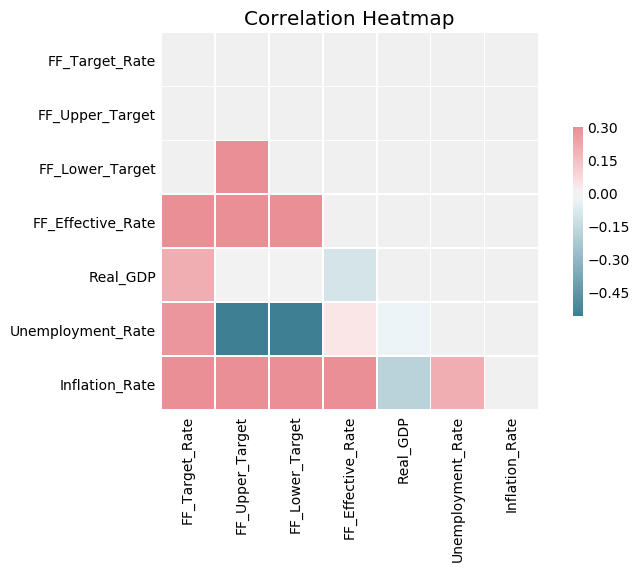

In [26]:
# INTEREST RATE DATASET
plt.figure(figsize=(8,5))
rt.plot_corr_heatmap(interest_rates,interest_rates.drop(columns=['Year', 'Month', 'Day']).columns);

**A look at the datasets distributions of elements to determin best methods for cleaning the data**<br>

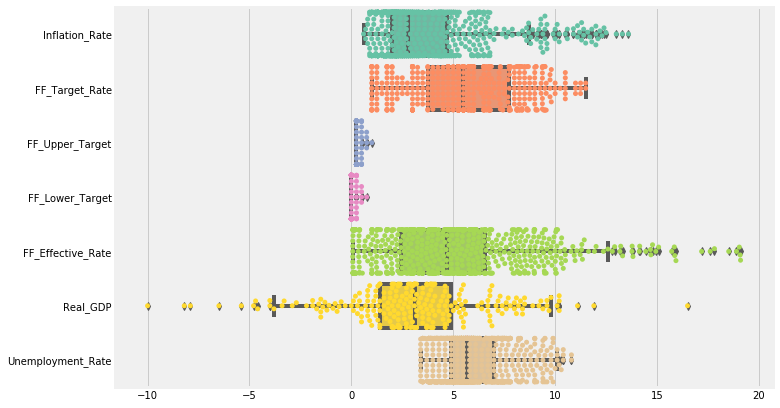

In [28]:
# look at distributions of dataset elements, determin best methods for cleaning the data
cols =['Inflation_Rate','FF_Target_Rate', 'FF_Upper_Target', 'FF_Lower_Target', 'FF_Effective_Rate', 'Real_GDP', 'Unemployment_Rate']
plt.figure(figsize=(10.5,7))
sns.boxplot(data=interest_rates[cols], orient='h',palette='Set2');
sns.swarmplot(data=interest_rates[cols], orient='h',palette='Set2');
plt.show()

#### ECONOMIC DATASETS - DATAHUB.IO
* Datasets:<br>
    * Interest Rate:<br>
        * keep Year, Month, Federal Funds Target Rate<br>
    * Inflation Consumer:<br>
        * filter on Country = 'United States', keep Year, Inflation - drop the rest<br>
    * GDP Year:<br>
        * Change column names<br>

**This process continuous for the remainder of the datasets. See accompaning notebook for details.**

In [58]:
# interest_rates
# interest rate -  keep Year, Month, Federal Funds Target Rate - get rid of the rest...
ir = interest_rates_dh[~interest_rates_dh['Federal Funds Target Rate'].isna()]
ir = ir[['Year','Month','Federal Funds Target Rate']]
ir = ir.rename(index=str, columns={'Federal Funds Target Rate':'FF_Target_Rate'})
logger.debug(ir.Year.unique())
ec_datasets['Interest_Rate_Month'] = ir
#ir.head()

In [53]:
# interest_rates - average by year
ir_y = pd.DataFrame(ir.groupby('Year').mean()['FF_Target_Rate'])
ir_y = ir_y.rename(index=str, columns={'FF_Target_Rate':'FF_Target_Rate_Avg'})
ir_y = ir_y.reset_index()
ec_datasets['Interest_Rate_Year'] = ir_y
#ir_y.head()

In [59]:
# inflation_consumer - filter on Country = 'United States', keep Year, Inflation - drop the rest
ic = inflation_consumer[inflation_consumer.Country.str.contains('United States')]
ic = ic[['Year','Inflation']]
ec_datasets['Inflation_Year'] = ic
#ic.head()

In [60]:
# gdp_year
'''
level-current -> GDP in billions of current dollars
change-current -> GDP percent change based on current dollars
'''
gdp_y = gdp_year[['date','level-current','change-current']]
gdp_y = gdp_y.rename(index=str, columns={'date':'Year', 'level-current':'GDP','change-current':'GDP_Percent_Change'})
ec_datasets['GDP_Year'] = gdp_y
#gdp_y.head()

In [62]:
# gdp_quarter
gdp_q = gdp_quarter[['date','level-current','change-current']]
gdp_q = gdp_q.rename(index=str, columns={'date':'Date', 'level-current':'GDP','change-current':'GDP_Percent_Change'})
gdp_q['Date'] = pd.to_datetime(gdp_q['Date'])
gdp_q['Year'], gdp_q['Month'] = gdp_q['Date'].dt.year, gdp_q['Date'].dt.month
gdp_q = gdp_q.drop(columns=['Date'])
gdp_q = gdp_q[['Year','Month','GDP','GDP_Percent_Change']]

ec_datasets['GDP_Quarter'] = gdp_q
#gdp_q.head()

In [63]:
# create a gdp_monthly by averaging the quarterly for the year

# TODO - need to group by year, then quarter, take average and span that over those three months creating new records

gdp_m = pd.DataFrame(gdp_q.groupby('Year', as_index=False)['GDP','GDP_Percent_Change'].mean())
gdp_m = gdp_m.rename(index=str, columns={'GDP':'GDP_Avg', 'GDP_Percent_Change':'GDP_Percent_Change_Avg'})

ec_datasets['GDP_Month'] = gdp_m
#gdp_m.head()

In [64]:
# education_budget
'''
United States of America education budget analysis
United States of America Education budget to GDP analysis Data Data comes from Office of Management and Budget
BUDGET_ON_EDUCATION -> budget in millions of dollars
GDP -> GDP in millions of dollars
RATIO -> education expendature / GDP in percentage
'''
logger.debug(f'education budget, before... \n{education_budget.head()}')
eb = education_budget[['YEAR','BUDGET_ON_EDUCATION']]
eb = eb.rename(index=str, columns={'YEAR':'Year', 'BUDGET_ON_EDUCATION':'Education_Budget'})
logger.debug(f'education budget, after... \n{eb.head()}')

ec_datasets['Eduction_Budget'] = eb
#eb.head()

In [65]:
# population
'''
Population figures for countries, regions (e.g. Asia) and the world. 
'''
# population - keep Year, Value - drop the rest
pop = population[population['Country Name'].str.contains('United States')]
pop = pop[['Year','Value']]
pop = pop.rename(index=str, columns={'Value':'Population'})
ec_datasets['Population'] = pop
#pop.head()

In [66]:
# investor_flow_monthly
'''
Monthly net new cash flow by US investors into various mutual fund investment classes (equities, bonds etc)
'''
logger.debug(f'us investor flow monthly ... {investor_flow_monthly.head()}')

ifm_t = investor_flow_monthly[['Date','Total']]
ifm_t = ifm_t.rename(index=str, columns={'Total':'Investor_Flow'})
ifm_t['Date'] = pd.to_datetime(ifm_t['Date'])
ifm_t['Year'], ifm_t['Month'] = ifm_t['Date'].dt.year, ifm_t['Date'].dt.month

ifm_t = ifm_t[['Year','Month','Investor_Flow']]
logger.debug(f'us investor flow monthly total ... {investor_flow_monthly.head()}')

ec_datasets['Investor_Flow_Month'] = ifm_t
#ifm_t.head()

In [67]:
# investor_flow_monthly - average out to yea
ifm_t_y = pd.DataFrame(ifm_t.groupby('Year').mean()['Investor_Flow'])
ifm_t_y = ifm_t_y.rename(index=str, columns={'Investor_Flow':'Investor_Flow_Avg'})
ifm_t_y = ifm_t_y.reset_index()

ec_datasets['Investor_Flow_Year'] = ifm_t_y
#ifm_t_y.head()

In [68]:
# housing_price_city
'''
US House Price Index (Case-Shiller) - narrow down to national index
'''
logger.debug(f'US House Price Index ... {housing_price_cities.head()}')

hp_index_m = housing_price_cities[['Date','National-US']]
hp_index_m = hp_index_m.rename(index=str, columns={'National-US':'National_House_Price_Index'})
hp_index_m['Date'] = pd.to_datetime(hp_index_m['Date'])
hp_index_m['Year'], hp_index_m['Month'] = hp_index_m['Date'].dt.year, hp_index_m['Date'].dt.month
hp_index_m = hp_index_m[['Year','Month','National_House_Price_Index']]

ec_datasets['Houseing_Price_Index_Month'] = hp_index_m
#hp_index_m.head()

In [69]:
# housing_price_city - aggregate to yearly average price index
hp_idex_y = pd.DataFrame(hp_index_m.groupby('Year').mean()['National_House_Price_Index'])
hp_idex_y = hp_idex_y.rename(index=str, columns={'National_House_Price_Index':'National_HPI_Avg'})
hp_idex_y = hp_idex_y.reset_index()

ec_datasets['Houseing_Price_City_Year'] = hp_idex_y
#hp_idex_y.head()

In [70]:
# household_income - keep Year, Number(thousands), Top 5 percent
'''

'''
logger.debug(f'{household_income.head()}')
hh_i = household_income[['Year','Number (thousands)']]
hh_i = hh_i.rename(index=str, columns={'Number (thousands)':'House_Hold_Income'})
hh_i = hh_i.sort_values('Year')

ec_datasets['House_Hold_Income_Year'] = hh_i
#hh_i.head()

In [71]:
# employment
'''
US Employment and Unemployment rates since 1940. Official title: 
*Employment status of the civilian noninstitutional population, 1940 to date* from USA Bureau of Labor Statistics
'''
logger.debug(f'employment ... {employment.head()}')
emp = employment[['year','employed_total','employed_percent','unemployed','unemployed_percent']]
emp = emp.rename(index=str, columns={'year':'Year','employed_total':'Employed','employed_percent':'Employed_Percent','unemployed':'Unemployed','unemployed_percent':'Unemployed_percent'})

ec_datasets['Employment_Year'] = emp
#emp.head()

In [77]:
# cpi
'''
Consumer Price Index for All Urban Consumers (CPI-U) from U.S. Department Of Labor Bureau of Labor Statistics. 
This is a monthly time series from January 1913. Values are U.S. city averages for all items and 1982-84=100.
'''
#logger.debug(f'cpi ... {cpi.head()}')
cpi_m = cpi[['Date','Index']]
cpi_m['Date'] = pd.to_datetime(cpi_m['Date'])
cpi_m['Year'], cpi_m['Month'] = cpi_m['Date'].dt.year, cpi_m['Date'].dt.month
cpi_m = cpi_m.rename(index=str, columns={'Index':'CPI_Index'})
cpi_m = cpi_m[['Year','Month','CPI_Index']]

ec_datasets['Consumer_Price_Index_Month'] = cpi_m
#cpi_m.head()

In [78]:
# cpi - yearly average
cpi_y = pd.DataFrame(cpi_m.groupby('Year').mean()['CPI_Index'])
cpi_y = cpi_y.rename(index=str, columns={'CPI_Index':'CPI_Index_Avg'})
cpi_y = cpi_y.reset_index()

ec_datasets['Consumer_Price_Index_Year'] = cpi_y
#cpi_y.head()

In [79]:
# cash_surp_def
'''

'''
csd = cash_surp_def[cash_surp_def['Country Name'].str.contains('United States')]
csd = csd[['Year','Value']]
csd = csd.rename(index=str, columns={'Value':'Cash_Surp_Def'})

ec_datasets['Cash_Surpluse_Defesit_Year'] = csd
#csd.head()

In [80]:
# bonds_yeilds_10y
'''
10 year US Government Bond Yields (long-term interest rate)
10 year nominal yields on US government bonds from the Federal Reserve. 
The 10 year government bond yield is considered a standard indicator of long-term interest rates. 
'''
logger.debug(f'bonds yeilds 10y:\n{bonds_yeilds_10y.head()}')

by_10y_m = bonds_yeilds_10y[['Date','Rate']]
by_10y_m['Date'] = pd.to_datetime(by_10y_m['Date'])
by_10y_m['Year'], by_10y_m['Month'] = by_10y_m['Date'].dt.year, by_10y_m['Date'].dt.month
by_10y_m = by_10y_m[['Year','Month','Rate']]
by_10y_m = by_10y_m.rename(index=str, columns={'Rate':'Bond_Yield_10y'})

ec_datasets['Bonds_Yeilds_10y_Month'] = by_10y_m
#by_10y_m.head()

In [81]:
# bonds_yeilds_10y - averaged over the year
by_10y_y = pd.DataFrame(by_10y_m.groupby('Year').mean()['Bond_Yield_10y'])
by_10y_y = by_10y_y.rename(index=str, columns={'Bond_Yield_10y':'Bond_Yield_10y_Avg'})
by_10y_y = by_10y_y.reset_index()

ec_datasets['Bonds_Yeilds_10y_Year'] = by_10y_y
#by_10y_y.head()

In [82]:
# merge tables by year - basd on the smallest range in the dataset, this is limited to 1982-2008
ir_y['Year'] = ir_y['Year'].astype(str)
ic['Year'] = ic['Year'].astype(str)
gdp_y['Year'] = gdp_y['Year'].astype(str)
eb['Year'] = eb['Year'].astype(str)
pop['Year'] = pop['Year'].astype(str)
ifm_t_y['Year'] = ifm_t_y['Year'].astype(str)
hp_idex_y['Year'] = hp_idex_y['Year'].astype(str)
hh_i['Year'] = hh_i['Year'].astype(str)
emp['Year'] = emp['Year'].astype(str)
cpi_y['Year'] = cpi_y['Year'].astype(str)
csd['Year'] = csd['Year'].astype(str)
by_10y_y['Year'] = by_10y_y['Year'].astype(str)


ir['Year'] = ir['Year'].astype(str)
gdp_m['Year'] = gdp_m['Year'].astype(str)
ifm_t['Year'] = ifm_t['Year'].astype(str)
hp_index_m['Year'] = hp_index_m['Year'].astype(str)
cpi_m['Year'] = cpi_m['Year'].astype(str)
by_10y_m['Year'] = by_10y_m['Year'].astype(str)

#ir_y.head()

In [84]:
# merge tables by year - basd on the smallest range in the dataset, this is limited to 1982-2008
d = pd.merge(ir_y, ic, on='Year', how='left')
d = pd.merge(d, gdp_y, on='Year', how='left')
d = pd.merge(d, eb, on='Year', how='left')
d = pd.merge(d, pop, on='Year', how='left')
d = pd.merge(d, ifm_t_y, on='Year', how='left')
d = pd.merge(d, hp_idex_y, on='Year', how='left')
d = pd.merge(d, hh_i, on='Year', how='left')
d = pd.merge(d, emp, on='Year', how='left')
d = pd.merge(d, cpi_y, on='Year', how='left')
d = pd.merge(d, csd, on='Year', how='left')
d = pd.merge(d, by_10y_y, on='Year', how='left')

economicDf_year = d

del d

# save df as new data source
save_as = f'{dataDir}/economic_yearly_data.csv'
economicDf_year.to_csv(save_as,index=False)


**Merged Dataframe of Economic features aggregated from their individual source files**

In [85]:
economicDf_year.head()

,Year,FF_Target_Rate_Avg,Inflation,GDP,GDP_Percent_Change,Education_Budget,Population,Investor_Flow_Avg,National_HPI_Avg,House_Hold_Income,Employed,Employed_Percent,Unemployed,Unemployed_percent,CPI_Index_Avg,Cash_Surp_Def,Bond_Yield_10y_Avg
0,1982,9.392857,6.203740,3345.0,8.8,15374.0,231664000.0,NaN,NaN,83918,99526,57.8,10678,9.7,96.500000,-2.735732,13.001667
1,1983,9.053125,3.948367,3638.1,11.1,15267.0,233792000.0,NaN,NaN,85290,100834,57.9,10717,9.6,99.600000,-4.819500,11.105000
2,1984,10.150000,3.548237,4040.7,7.6,15336.0,235825000.0,NaN,NaN,86789,105005,59.5,8539,7.5,103.883333,-3.676845,12.438333
3,1985,8.044643,3.199612,4346.7,5.6,18952.0,237924000.0,NaN,NaN,88458,107150,60.1,8312,7.2,107.566667,-3.927316,10.623333
4,1986,6.740132,2.017624,4590.2,6.1,17750.0,240133000.0,NaN,NaN,89479,109597,60.7,8237,7.0,109.608333,-4.248440,7.682500


In [86]:
try:
    del gdp_year,gdp_y,gdp_quarter,gdp_q,gdp_m,eb,ir,ir_y,ic,education_budget,pop,
    investor_flow_monthly,
    housing_price_cities,
    household_income,
    employment,
    cpi,
    cash_surp_def,
    bonds_yeilds_10y,
    ifm_t,
    ifm_t_y,
    hp_index_m,
    hp_idex_y,
    hh_i,
    emp,
    cpi_m,
    cpi_y,
    csd,
    by_10y_m,
    by_10y_y,
    datasets_to_merge_year,
    datasets_to_merge_month
except:
    pass

**Correlation Heatmap of the new Economic Dataset's features**

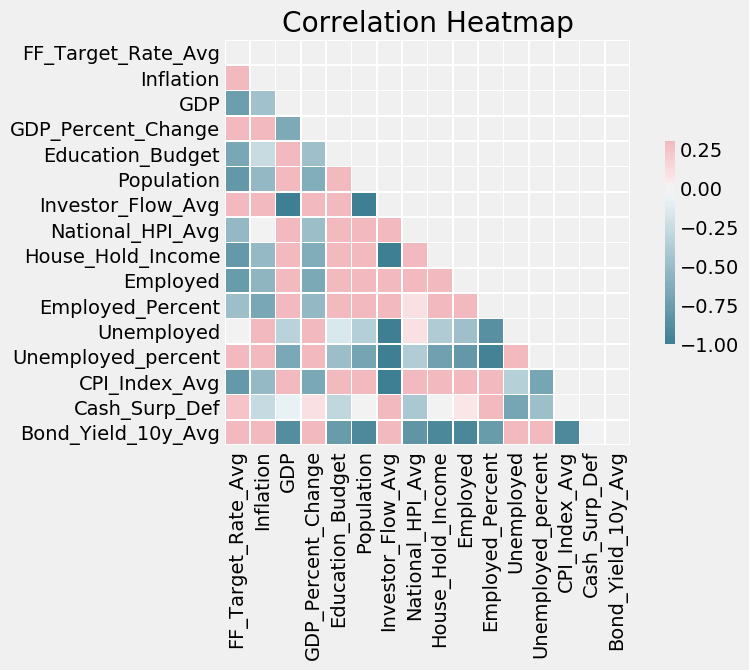

In [90]:
#plt.figure(figsize=(12,8))
rt.plot_corr_heatmap(economicDf_year,economicDf_year.drop(columns=['Year']).columns)
#plt.show()

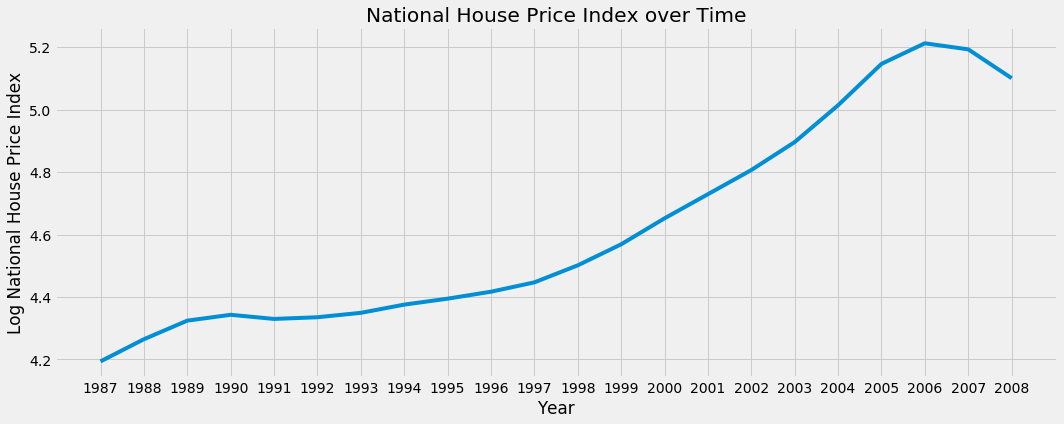

In [91]:
p = economicDf_year
p['National_HPI_Avg'] = np.log(p['National_HPI_Avg'])
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Year',y='National_HPI_Avg',data=p)
plt.title('National House Price Index over Time')
plt.ylabel('Log National House Price Index')

plt.show()
del p

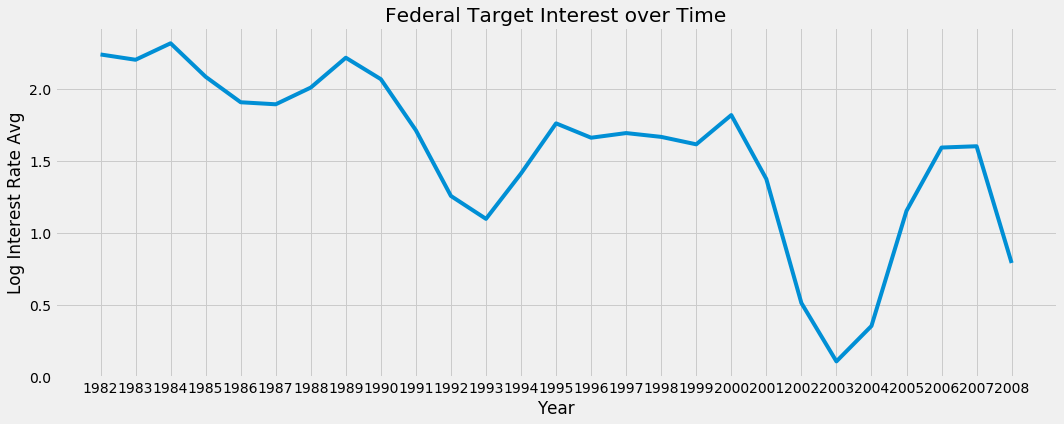

In [92]:
p = economicDf_year
p['FF_Target_Rate_Avg'] = np.log(p['FF_Target_Rate_Avg'])
plt.figure(figsize=(16,6))
ax = sns.lineplot(x='Year',y='FF_Target_Rate_Avg',data=p)
plt.title('Federal Target Interest over Time')
plt.ylabel('Log Interest Rate Avg')

plt.show()
del p

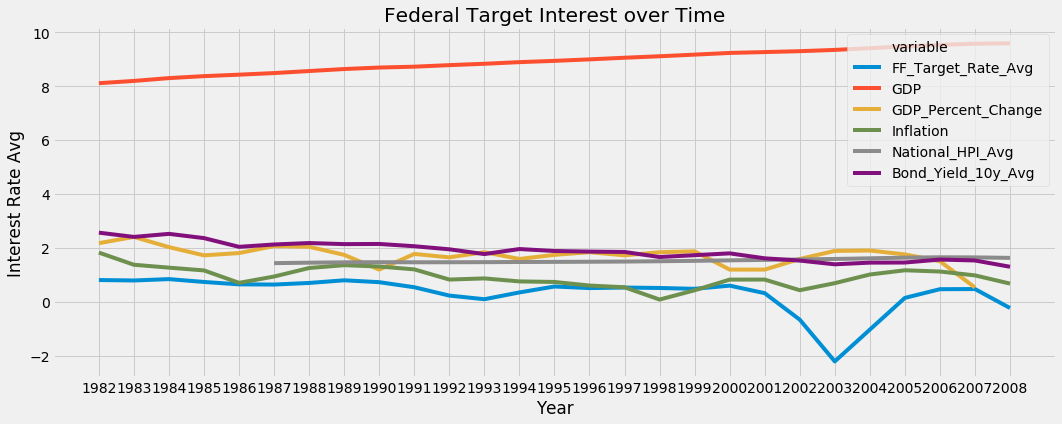

In [93]:
factors = ['Year','FF_Target_Rate_Avg','GDP','GDP_Percent_Change','Inflation','National_HPI_Avg','Bond_Yield_10y_Avg']
melt = pd.melt(economicDf_year[factors], ['Year'])
melt['value'] = np.log(melt['value'])
plt.figure(figsize=(16,6))
sns.lineplot(x='Year',y='value',hue='variable',
             data=melt)


plt.title('Federal Target Interest over Time')
plt.ylabel('Interest Rate Avg')
plt.show()
del melt

<Figure size 1152x432 with 0 Axes>

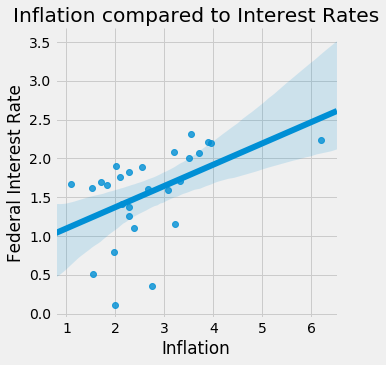

In [94]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Inflation',y='FF_Target_Rate_Avg',data=economicDf_year)
plt.title('Inflation compared to Interest Rates')
plt.xlabel('Inflation')
plt.ylabel('Federal Interest Rate')
plt.show();

### Impacts of Economic Factors on National Housing Price Index Avg

<Figure size 1152x432 with 0 Axes>

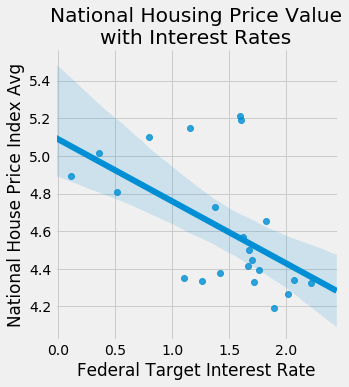

In [95]:
plt.figure(figsize=(16,6))
sns.lmplot(x='FF_Target_Rate_Avg',y='National_HPI_Avg',data=economicDf_year)
plt.title('National Housing Price Value\nwith Interest Rates')
plt.xlabel('Federal Target Interest Rate')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

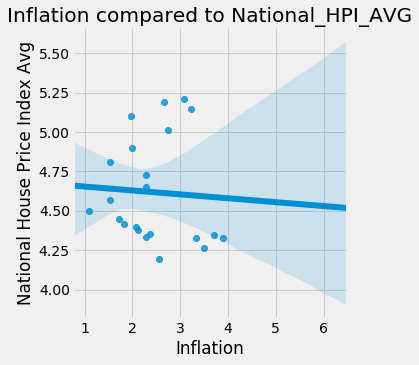

In [96]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Inflation',y='National_HPI_Avg',data=economicDf_year)
plt.title('Inflation compared to National_HPI_AVG')
plt.xlabel('Inflation')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

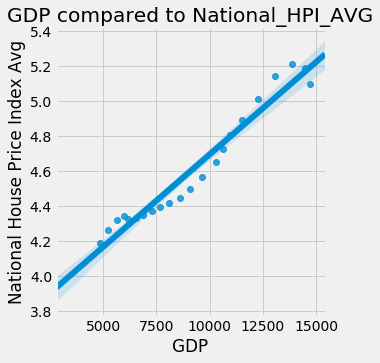

In [97]:
plt.figure(figsize=(16,6))
sns.lmplot(x='GDP',y='National_HPI_Avg',data=economicDf_year)
plt.title('GDP compared to National_HPI_AVG')
plt.xlabel('GDP')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 864x432 with 0 Axes>

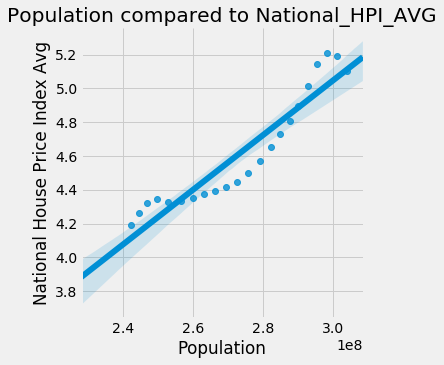

In [102]:
plt.figure(figsize=(12,6));
sns.lmplot(x='Population',y='National_HPI_Avg',data=economicDf_year);
plt.title('Population compared to National_HPI_AVG')
plt.xlabel('Population')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 864x432 with 0 Axes>

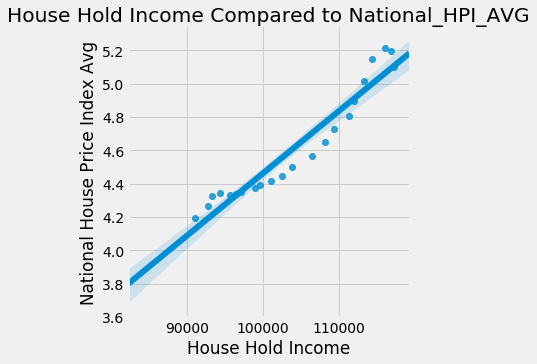

In [103]:
plt.figure(figsize=(12,6))
sns.lmplot(x='House_Hold_Income',y='National_HPI_Avg',data=economicDf_year)
plt.title('House Hold Income Compared to National_HPI_AVG')
plt.xlabel('House Hold Income')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

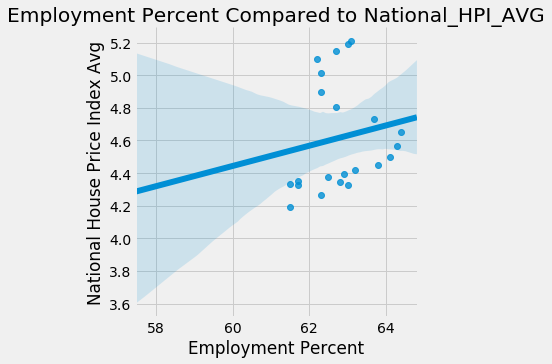

In [104]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Employed_Percent',y='National_HPI_Avg',data=economicDf_year)
plt.title('Employment Percent Compared to National_HPI_AVG')
plt.xlabel('Employment Percent')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

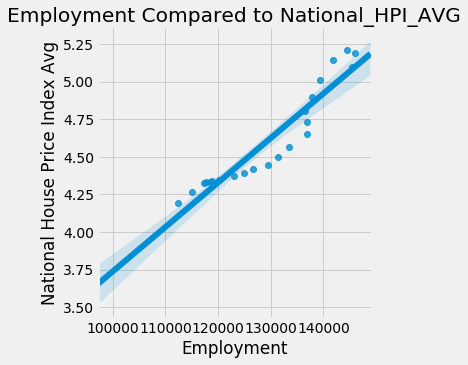

In [105]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Employed',y='National_HPI_Avg',data=economicDf_year)
plt.title('Employment Compared to National_HPI_AVG')
plt.xlabel('Employment')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

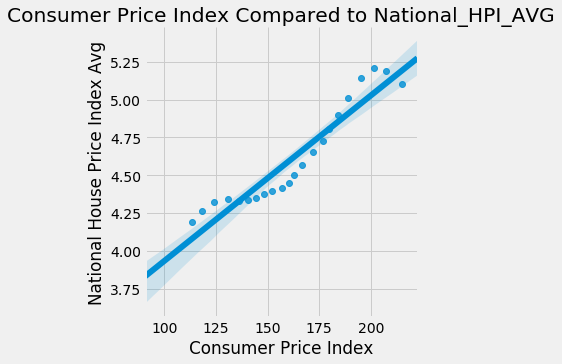

In [106]:
plt.figure(figsize=(16,6))
sns.lmplot(x='CPI_Index_Avg',y='National_HPI_Avg',data=economicDf_year)
plt.title('Consumer Price Index Compared to National_HPI_AVG')
plt.xlabel('Consumer Price Index')
plt.ylabel('National House Price Index Avg')
plt.show();

<Figure size 1152x432 with 0 Axes>

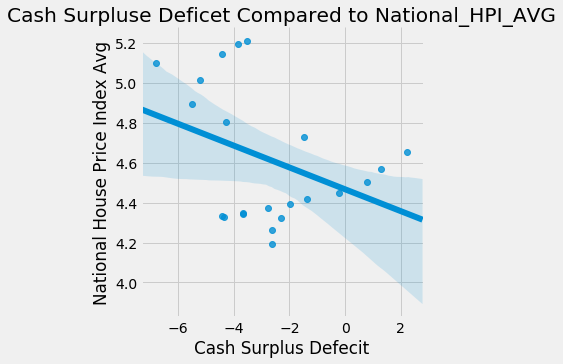

In [107]:
plt.figure(figsize=(16,6))
sns.lmplot(x='Cash_Surp_Def',y='National_HPI_Avg',data=economicDf_year)
plt.title('Cash Surpluse Deficet Compared to National_HPI_AVG')
plt.xlabel('Cash Surplus Defecit')
plt.ylabel('National House Price Index Avg')
plt.show();

# 2. Time Series Analysis
**-------------------------------------------------------------------------------------------------**   
Time series analysis on real estate median average price by zipcode
* Single Family Home Value
* Rental Price psf
* Listing Price
Create future prediction models for all WA State zipcodes historical monthly housing price values.

## 2.1 Analysis

### Transform Data
Transform Real Estate data for time series analysis

In [109]:
# Transform Datasets for Prophet Timeseries Analysis
# training datasets
re_datasets_train_prophet = {}
for k,v in re_datasets_train.items():
    re_datasets_train_prophet[k] = brs.dfTransformForProphet(v,['State'],'ZipCode', logger)

# validation datasets
re_datasets_validate_prophet = {}
for k,v in re_datasets_validate.items():
    re_datasets_validate_prophet[k] = brs.dfTransformForProphet(v,['State'],'ZipCode', logger)

# full datasets
re_datasets_full_prophet = {}
for k,v in re_datasets.items():
    re_datasets_full_prophet[k] = brs.dfTransformForProphet(v,['State'],'ZipCode', logger)

In [110]:
sfr_price_zipcode_date = re_datasets['Single_Family_Residence'].drop(columns=['State'])
sfr_price_zipcode_date_t = sfr_price_zipcode_date.set_index('ZipCode')
sfr_price_zipcode_date_t = sfr_price_zipcode_date_t.T

In [111]:
#sfr_price_zipcode_date_t.head()

# reset index - bring date up as feature
sfr_price_zip = sfr_price_zipcode_date_t.reset_index()
sfr_price_zip = sfr_price_zip.rename(columns={'index':'Date'})
sfr_price_zip['Date'] = pd.to_datetime(sfr_price_zip['Date'])
sfr_price_zip.head()

# save to file
# save df as new data source
save_as = f'{dataDir}/sfr_price_zip.csv'
sfr_price_zip.to_csv(save_as,index=False)

## 2.2 Exploration

In [112]:
# have a look over the datasets shape after transformation
for k,v in re_datasets_train_prophet.items():
    logger.info(f'{k} shape: {v.shape}')
    
for k,v in re_datasets_validate_prophet.items():
    logger.info(f'{k} shape: {v.shape}')

for k,v in re_datasets_full_prophet.items():
    logger.info(f'{k} shape: {v.shape}')

INFO:file_logger:Single_Family_Residence shape: (252, 351)
INFO:file_logger:All_Homes shape: (252, 353)
INFO:file_logger:RentalPrice_PSF shape: (95, 66)
INFO:file_logger:RentalPrice_All_Homes shape: (95, 82)
INFO:file_logger:ListingPrice_All_Homes shape: (96, 261)
INFO:file_logger:Single_Family_Residence shape: (12, 351)
INFO:file_logger:All_Homes shape: (12, 353)
INFO:file_logger:RentalPrice_PSF shape: (12, 66)
INFO:file_logger:RentalPrice_All_Homes shape: (12, 82)
INFO:file_logger:ListingPrice_All_Homes shape: (12, 261)
INFO:file_logger:Single_Family_Residence shape: (264, 351)
INFO:file_logger:All_Homes shape: (264, 353)
INFO:file_logger:RentalPrice_PSF shape: (107, 66)
INFO:file_logger:RentalPrice_All_Homes shape: (107, 82)
INFO:file_logger:ListingPrice_All_Homes shape: (108, 261)


## 2.3 Model
**Note: All timeseries models were ran prior on google colab and saved as pickle files for continued downstream application**

In [114]:
# perform ZipCod model creation and validation techniques
# build time series models
# perform exploratory data analysis techiques
# Build prophet timeseries models for the metro area, save to dictionary object
# 


#zipCodeModels = {}
#t = 0.0
#trainDir = 'train'

#make directories
#for k in datasets.keys():
#    if not os.path.exists(f'{modelDir}/{trainDir}/{k}'): 
#        os.makedirs(f'{modelDir}/{trainDir}/{k}')


#with rt.elapsed_timer() as elapsed:
    
#    for k,v in datasets_train_prophet.items():
#        logger.info(f'Starting... {k} prophet modeling... elapsed time: {elapsed()}')
        
#        for zipcode, price in tqdm(v.items()):
#            logger.info(f'Starting... {zipcode} prophet modeling... elapsed time: {elapsed()}')
#            model = brs.beProphet(zipcode,price,f'{modelDir}/{trainDir}/{k}/{zipcode}',logger,predPeriods=13)
    
#    logger.info(f'total elapsed time: {elapsed()}')
      

In [115]:
#make directories
#for k in datasets.keys():
    #if not os.path.exists(f'{imageDir}/{trainDir}/{k}'): 
       # os.makedirs(f'{imageDir}/{trainDir}/{k}')

In [116]:
# train and predict future zipcode performance

#zipCodeModels = {}
#t = 0.0
#future5Dir = 'future_5'
# time series model projection time
#ts_pred_periods = 12*5

#make directories
#for k in datasets.keys():
#    if not os.path.exists(f'{modelDir}/{future5Dir}/{k}'): 
#        os.makedirs(f'{modelDir}/{future5Dir}/{k}')

#
#with rt.elapsed_timer() as elapsed:
    
#    for k,v in datasets_full_prophet.items():
#        logger.info(f'Starting... {k} prophet modeling... elapsed time: {elapsed()}')
        
#        for zipcode, price in v.items():
#            logger.info(f'Starting... {zipcode} prophet modeling... elapsed time: {elapsed()}')
#            model = brs.beProphet(zipcode,price,f'{modelDir}/{future5Dir}/{k}/{zipcode}',logger,predPeriods=ts_pred_periods)
    
#    logger.info(f'total elapsed time: {elapsed()}')


In [117]:
#ec_datasets.keys()

In [119]:
# store economic prediction models
#ec_prophet_models = {}

In [118]:
#c = ec_datasets['Cash_Surpluse_Defesit_Year']
#c['Date'] = pd.to_datetime(c.Year.astype(str)+'-'+c.Month.astype(str))
#c['Date'] = pd.to_datetime(c.Year)
#c = c.drop(columns=['Year','Month'])
#c = c.drop(columns=['Year'])
#c['Cash_Surp_Def'] = np.log(c['Cash_Surp_Def'])
#c.tail()

In [120]:
#model_ds = 'Cash_Surp_Def'
#end_date = '2023-11-30'
#inf = c
#inf = inf.rename(index=str, columns={'Date':'ds', 'Cash_Surp_Def':'y'})
#predPeriods = (12*5) # monthly
#predPeriods = 10   # yearly

# setting uncertainty interval to 95%
#model = Prophet(interval_width=0.95)
#model_fit = model.fit(inf)
#ec_prophet_models[f'{model_ds}_model_fit'] = model_fit

# make future dates dataframe
#future_dates = model.make_future_dataframe(periods=predPeriods, freq='Y', include_history=True)

# model forecast
#forecast = model.predict(future_dates)
#ec_prophet_models[f'{model_ds}_model_forecast'] = forecast


#save model to file
#with open(f'{modelDir}/{model_ds}_fit','wb') as f:
#    pickle.dump(model,f)

#with open(f'{modelDir}/{model_ds}_forecast','wb') as f:
#    pickle.dump(forecast,f)


In [121]:
#forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)
#forecast.shape

In [123]:
#title = 'Cash_Surp_Def'
#plt.figure(figsize=(20,15))
#p_fit = model_fit.plot(forecast,uncertainty=True)
#ax = p_fit.get_axes()
#ax[0].set_title('Prophet Forcast', fontsize="15", color="black", horizontalalignment='center', verticalalignment='top')
#ax[0].set_xlabel('ZipCode: '+zipcode+' | '+'Date')
#ax[0].set_ylabel('')

#plt.savefig(imageDir+'/'+title+'_fit_plot.png')
#plt.show()


#pc_fit = model_fit.plot_components(forecast)
#ax = pc_fit.get_axes()
#ax[0].set_title(title)
#ax[0].set_xlabel('ZipCode: '+zipcode+' | '+'Date')
#ax[0].set_ylabel('Log Mean Home Prices')
#plt.figure(figsize=(16,6))
#plt.savefig(imageDir+'/'+title+'_fit_component_plot.png')
#plt.show()

In [124]:
#ec_prophet_models
# build data frame from forecasted economic factors
#ec_forecast_df = {}
#for k,v in ec_prophet_models.items():
    #print(k)
#    if 'forecast' in k:
#        ec_forecast_df[k] = v[['ds','yhat']]
        #print(v.head())
        

In [128]:
#*Read Models From File System*
#ec_forecast_df.keys()

In [127]:
# FEATURE ENGINEERING OF MISSING ECONOMIC TIME SERIES DATA - FORECAST PRODUCED BY PROPHET...
# 
# rename the yhat attributes to feature names
#start_date = pd.to_datetime('1997-01-01')

#cpi = ec_forecast_df['cpi_model_forecast']
#cpi = cpi.rename(columns={'yhat':'CPI_Index_Avg_f', 'ds':'Date'})
#mask = (cpi.Date >= start_date)
#cpi = cpi[mask]
#ec_forecast_df['cpi_model_forecast'] = cpi

#ir = ec_forecast_df['interest_rate_model_forecast']
#ir = ir.rename(columns={'yhat':'Interest_Rate_f', 'ds':'Date'})
#mask = (ir.Date >= start_date)
#ir = ir[mask]
#ec_forecast_df['interest_rate_model_forecast'] = ir

#ifm = ec_forecast_df['investor_flow_model_forecast']
#ifm = ifm.rename(columns={'yhat':'Investor_Flow_f', 'ds':'Date'})
#mask = (ifm.Date >= start_date)
#ifm = ifm[mask]
#ec_forecast_df['investor_flow_model_forecast'] = ifm

#hpi = ec_forecast_df['housing_price_index_model_forecast']
#hpi = hpi.rename(columns={'yhat':'Housing_Price_Index_f', 'ds':'Date'})
#mask = (hpi.Date >= start_date)
#hpi = hpi[mask]
#ec_forecast_df['housing_price_index_model_forecast'] = hpi

#by10 = ec_forecast_df['Bonds_Yeilds_10y_model_forecast']
#by10 = by10.rename(columns={'yhat':'Bond_Yeild_10y_f', 'ds':'Date'})
#mask = (by10.Date >= start_date)
#by10 = by10[mask]
#ec_forecast_df['Bonds_Yeilds_10y_model_forecast'] = by10

#inf = ec_forecast_df['Inflation_model_forecast']
#inf = inf.rename(columns={'yhat':'Inflation_f', 'ds':'Date'})
#mask = (inf.Date >= start_date)
#inf = inf[mask]
#ec_forecast_df['Inflation_model_forecast'] = inf

#gdp = ec_forecast_df['GDP_model_forecast']
#gdp = gdp.rename(columns={'yhat':'GDP_f', 'ds':'Date'})
#mask = (gdp.Date >= start_date)
#gdp = gdp[mask]
#ec_forecast_df['GDP_model_forecast'] = gdp

#pop = ec_forecast_df['Population_model_forecast']
#pop = pop.rename(columns={'yhat':'Population_f', 'ds':'Date'})
#mask = (pop.Date >= start_date)
#pop = pop[mask]
#ec_forecast_df['Population_model_forecast'] = pop

#hhi = ec_forecast_df['House_Hold_Income_Year_model_forecast']
#hhi = hhi.rename(columns={'yhat':'House_Hold_Income_f', 'ds':'Date'})
#mask = (hhi.Date >= start_date)
#hhi = hhi[mask]
#ec_forecast_df['House_Hold_Income_Year_model_forecast'] = hhi

#emp = ec_forecast_df['Employment_model_forecast']
#emp = emp.rename(columns={'yhat':'Employment_f', 'ds':'Date'})
#mask = (emp.Date >= start_date)
#emp = emp[mask]
#ec_forecast_df['Employment_model_forecast'] = emp

#csd = ec_forecast_df['Cash_Surp_Def_model_forecast']
#csd = csd.rename(columns={'yhat':'Cash_Surp_Def_f', 'ds':'Date'})
#mask = (csd.Date >= start_date)
#csd = csd[mask]
#ec_forecast_df['Cash_Surp_Def_model_forecast'] = csd


In [129]:
#ec_forecast_df['cpi_model_forecast'].head()

#df = None
#df_hold_first = None
#i = 0
#for k,v in ec_forecast_df.items():
#    print(k)
#    if i == 0:
#        df_hold_first = v
#    elif i == 1:
#        df = pd.merge(df_hold_first, v, on='Date', how='left')
#    else:
#        df = pd.merge(df, v, on='Date', how='left')
#    i = i+1

#economicDf_forecast = df


# save df as new data source
#save_as = f'{dataDir}/economic_forecast_data.csv'
#economicDf_forecast.to_csv(save_as,index=False)



In [130]:
#economicDf_forecast.tail(

## 2.4 Results

#### Training Data Sets
Price Trend from 1997 through 2017 - With a 12 month future prediction...   

<Figure size 1440x1080 with 0 Axes>

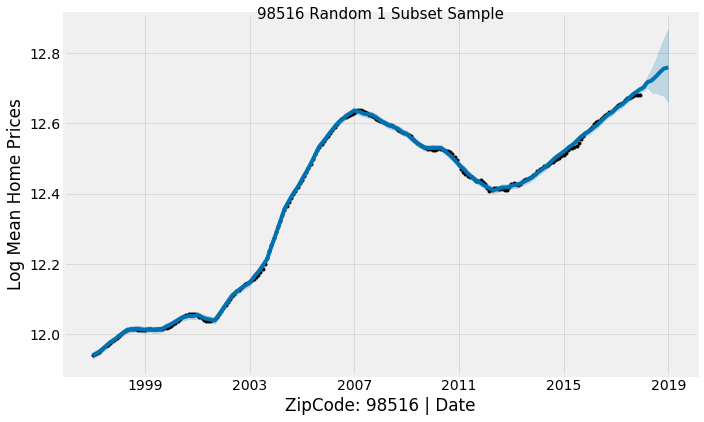

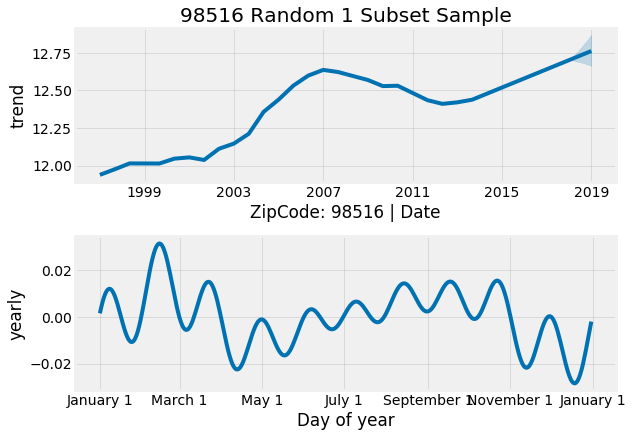

<Figure size 1440x1080 with 0 Axes>

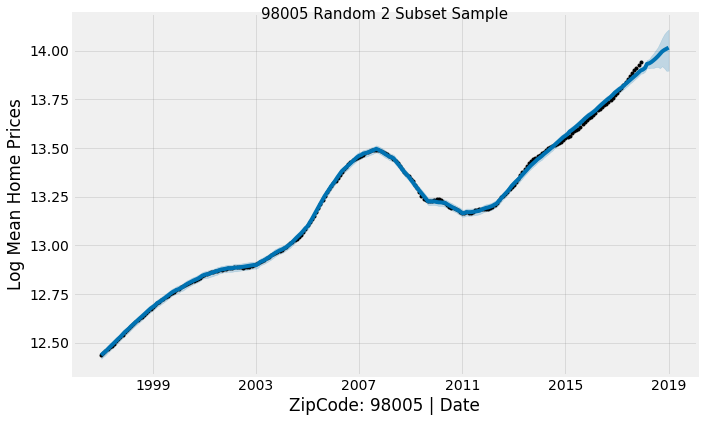

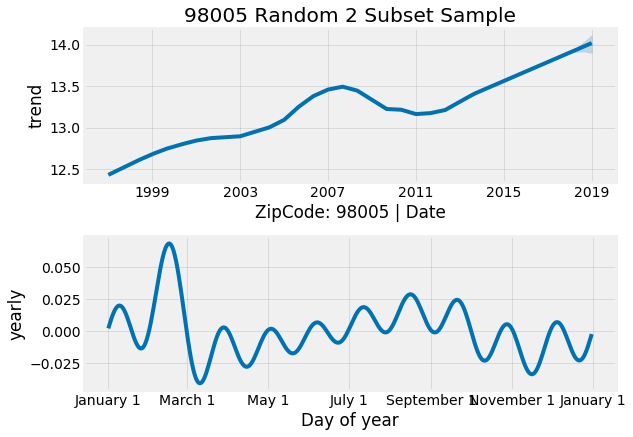

<Figure size 1440x1080 with 0 Axes>

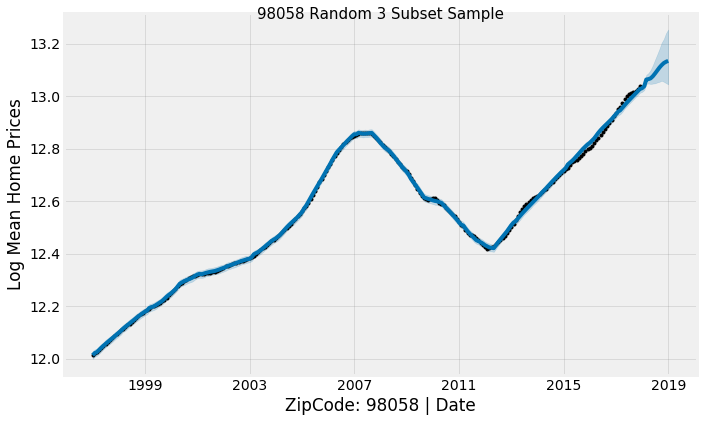

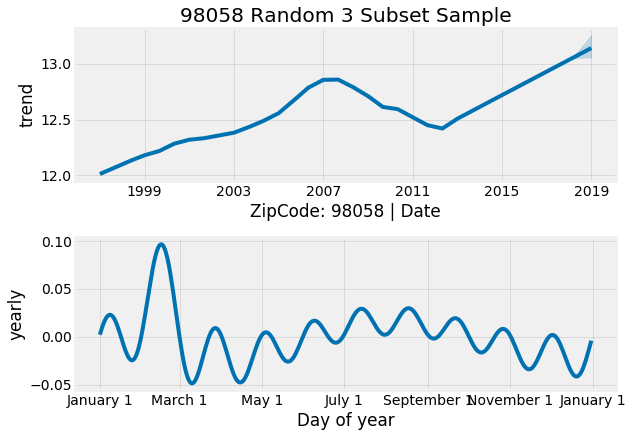

<Figure size 1440x1080 with 0 Axes>

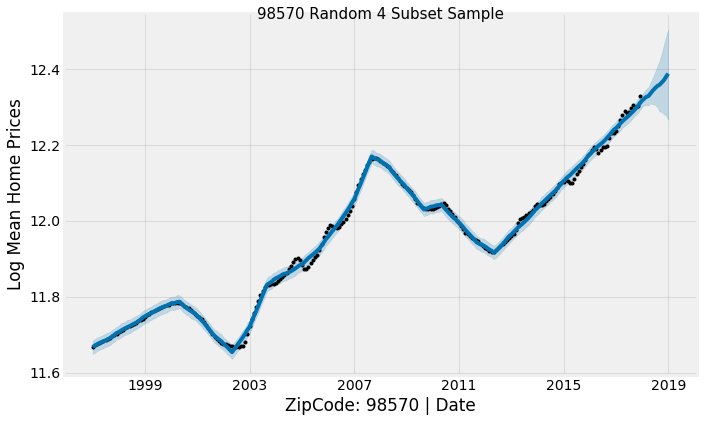

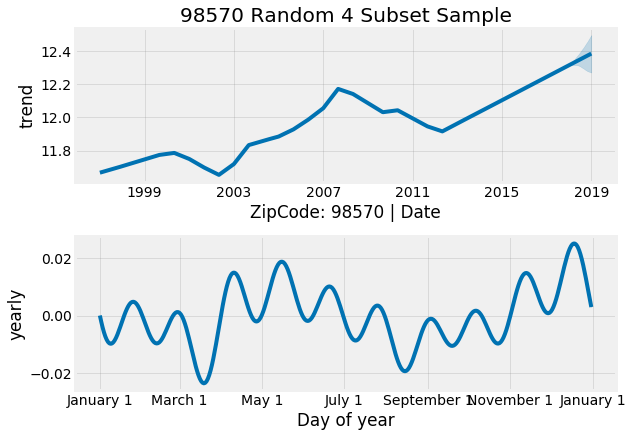

<Figure size 1440x1080 with 0 Axes>

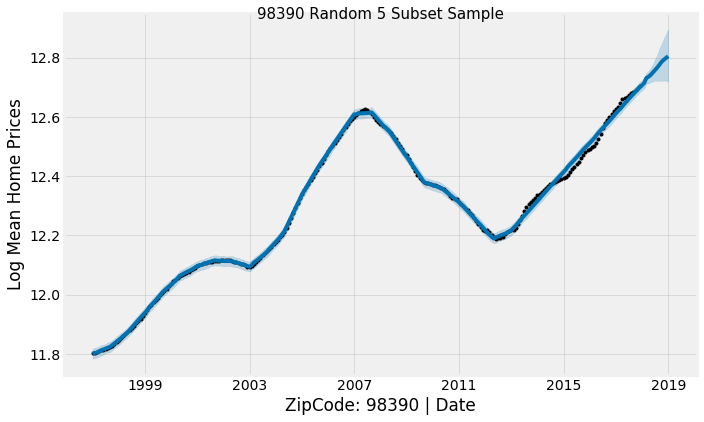

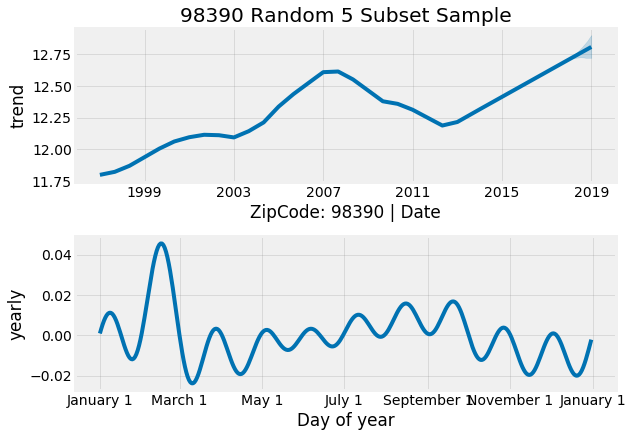

<Figure size 1440x1080 with 0 Axes>

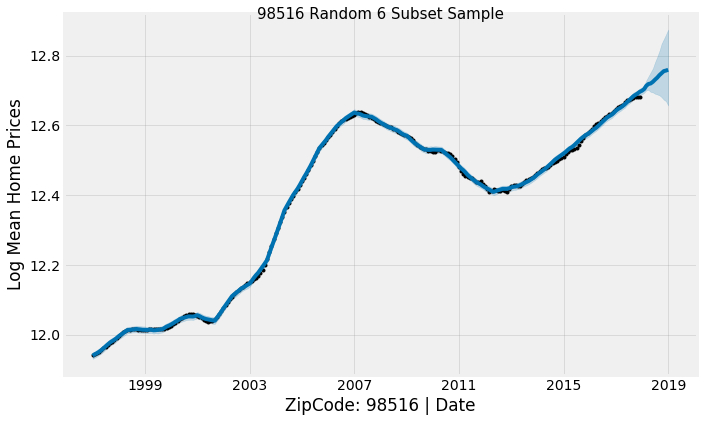

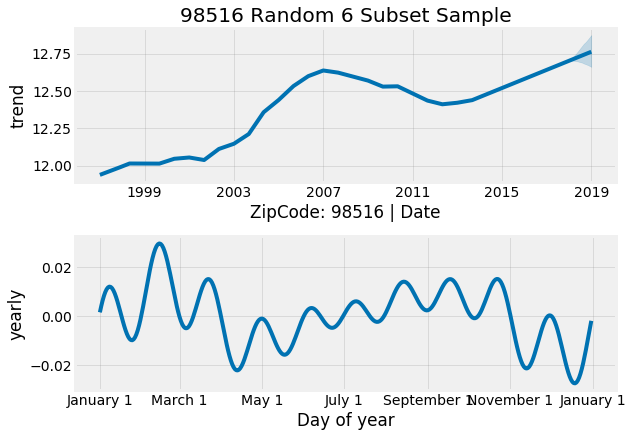

<Figure size 1440x1080 with 0 Axes>

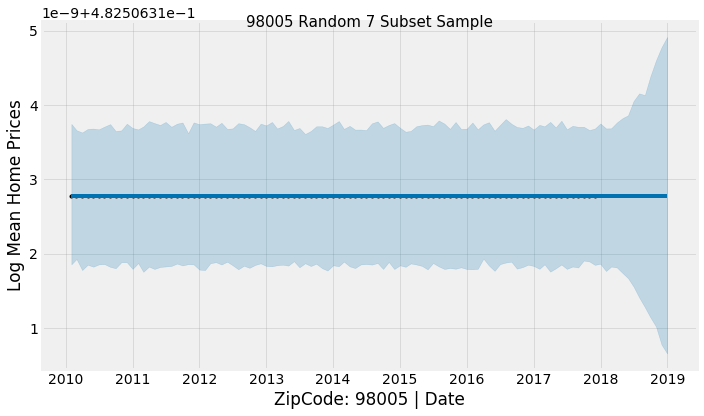

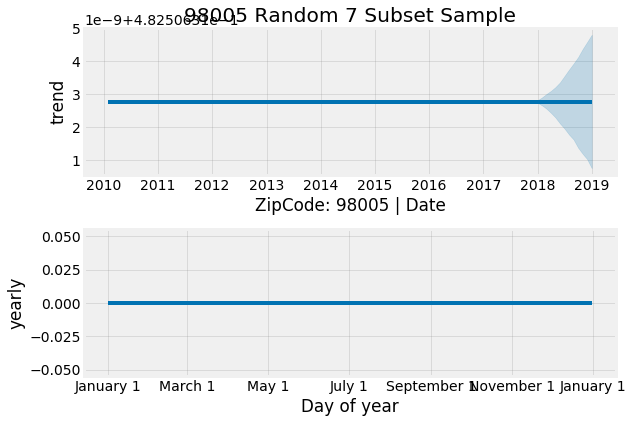

<Figure size 1440x1080 with 0 Axes>

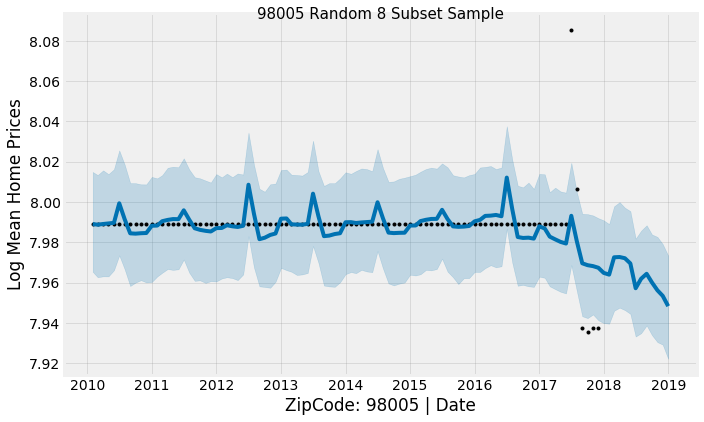

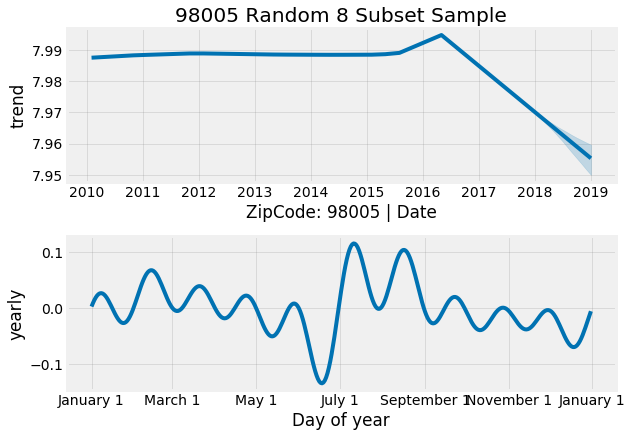

<Figure size 1440x1080 with 0 Axes>

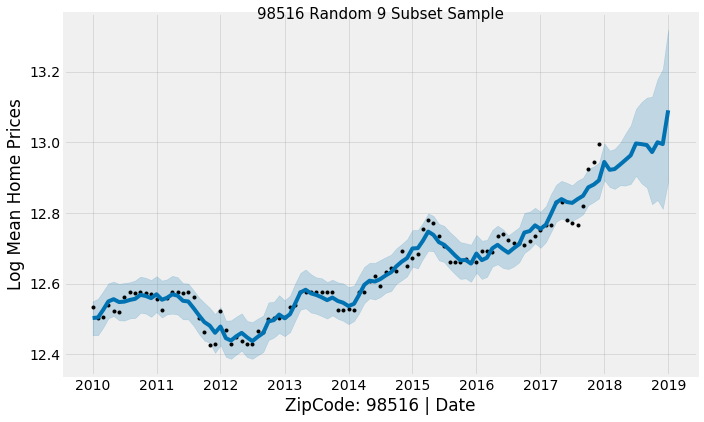

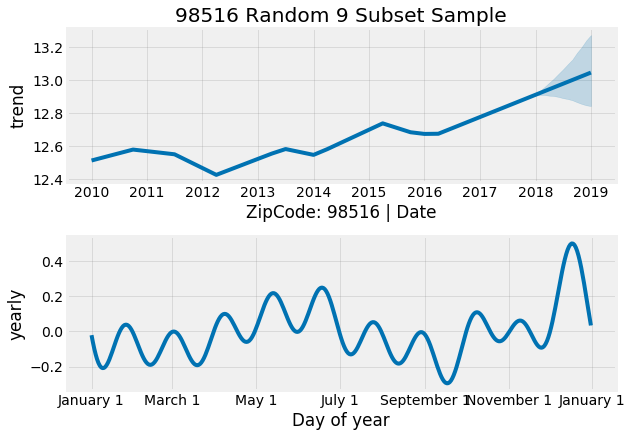

In [132]:
# pull in forecast samples
ran_zips = np.random.choice(re_datasets['Single_Family_Residence'].ZipCode,10,replace=False)
zipcode_eval = [] # 
i = 0
m_fit = None
m_forecast = None

for data_key in re_datasets.keys():

    for z in ran_zips:
        try:
            fitFile = f'{modelDir}/{trainDir}/{data_key}/{z}_fit'
            forecastFile = f'{modelDir}/{trainDir}/{data_key}/{z}_forecast'

            with open(fitFile,'rb') as f:
                m_fit = pickle.load(f)
                logger.debug(f'saved pickled timeseries model [{fitFile}] dataset found...')

            with open(forecastFile,'rb') as f:
                m_forecast = pickle.load(f)
                logger.debug(f'saved pickled timeseries model [{forecastFile}] dataset found...')

            
            brs.plotFit(z,m_fit,m_forecast,f'{z} Random {str(i+1)} Subset Sample',f'{imageDir}/{trainDir}/{data_key}/')
            i = i+1
            if i >= 5: break

        except FileNotFoundError:
            logger.debug('file not found...')

#### Future Prediction Trends
Price Trend from 1997 through 2018 - With a 5 year future prediction...   

<Figure size 1440x1080 with 0 Axes>

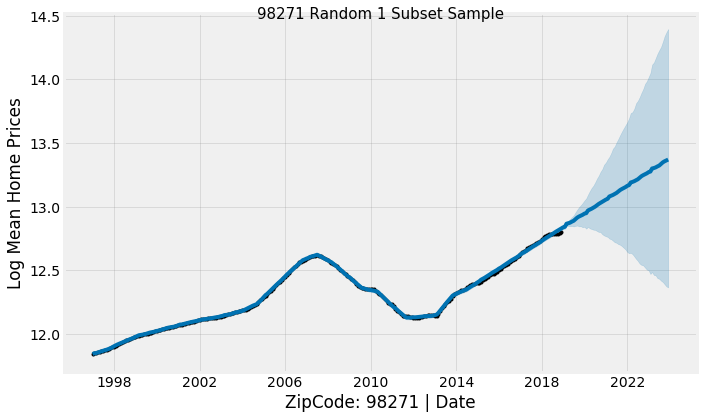

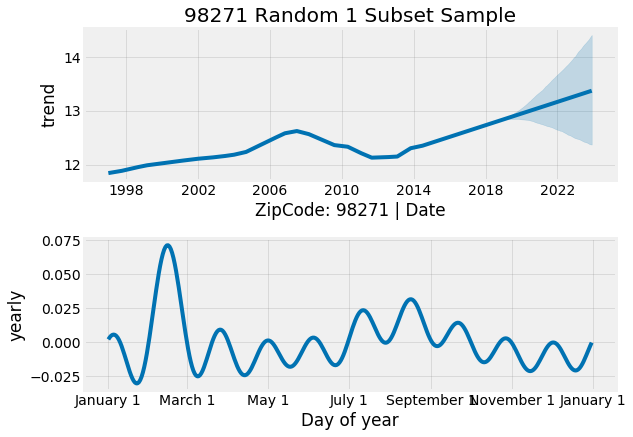

<Figure size 1440x1080 with 0 Axes>

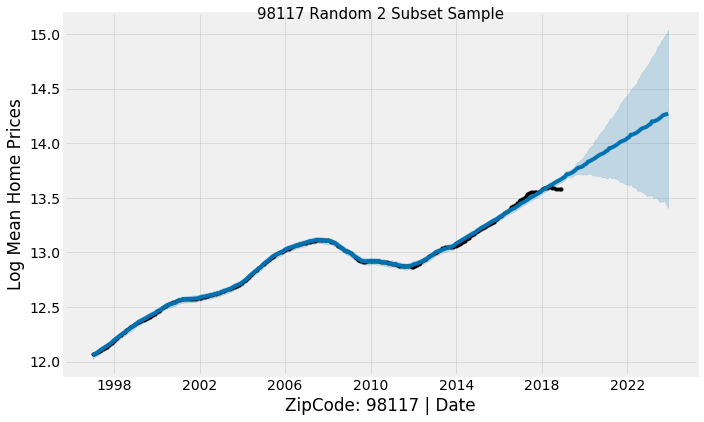

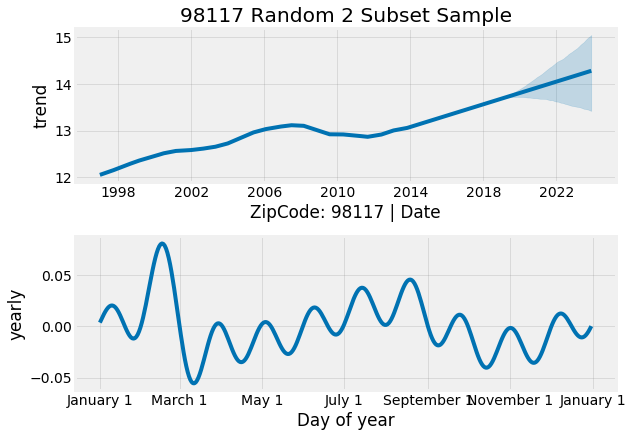

<Figure size 1440x1080 with 0 Axes>

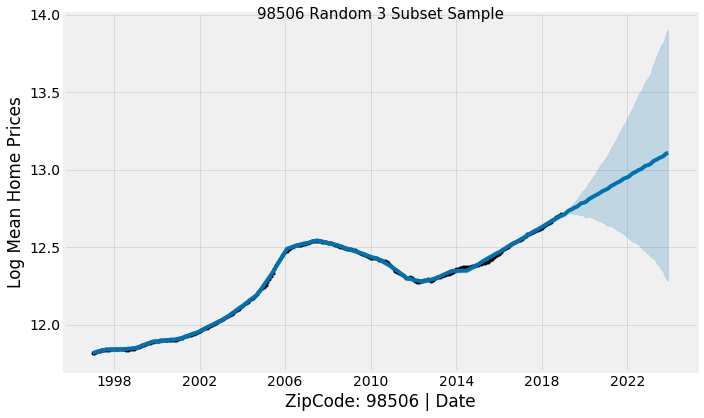

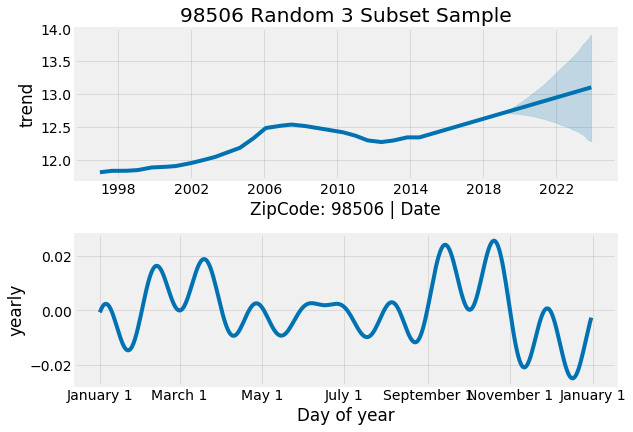

<Figure size 1440x1080 with 0 Axes>

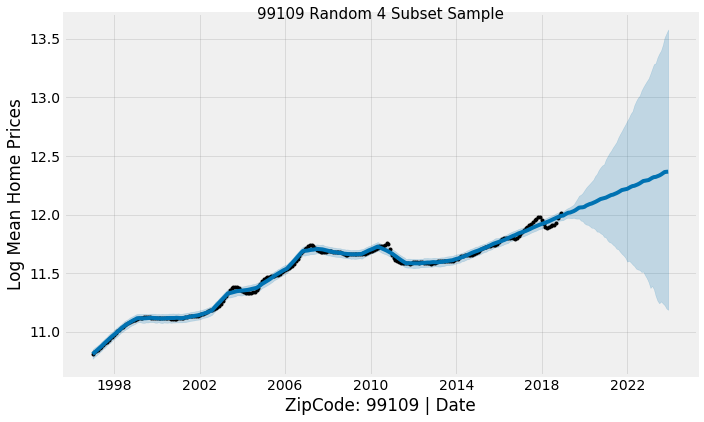

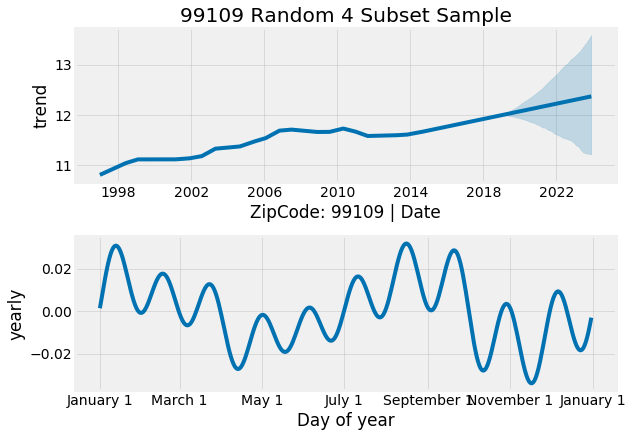

<Figure size 1440x1080 with 0 Axes>

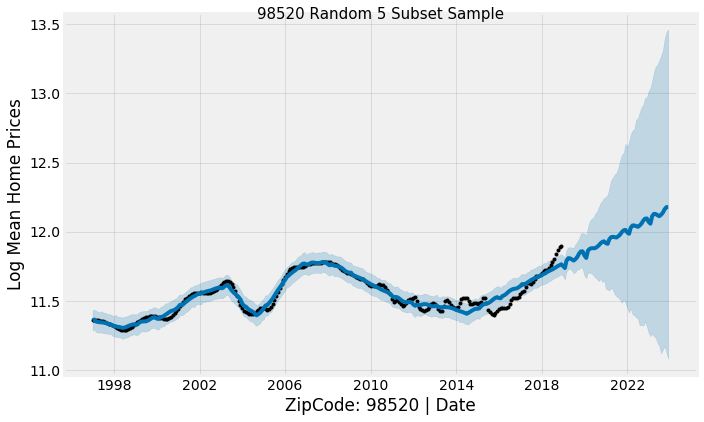

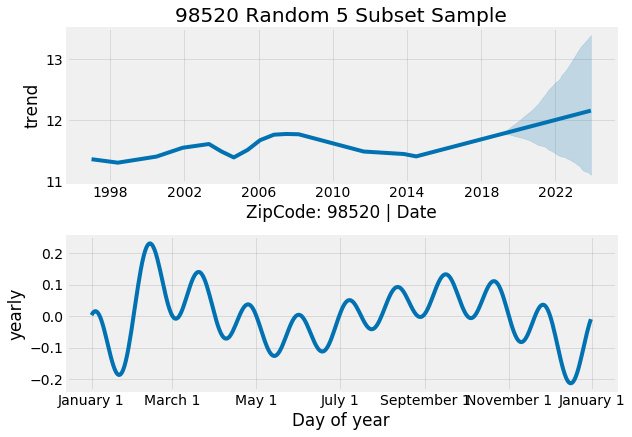

<Figure size 1440x1080 with 0 Axes>

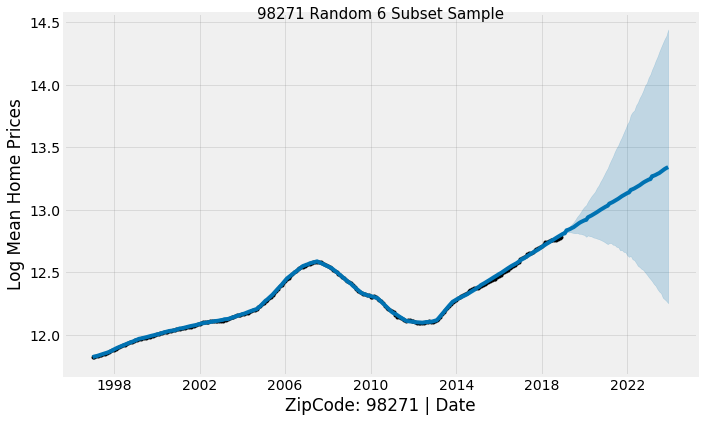

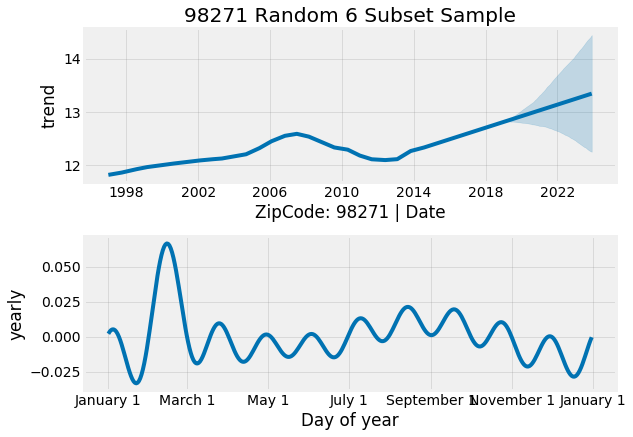

<Figure size 1440x1080 with 0 Axes>

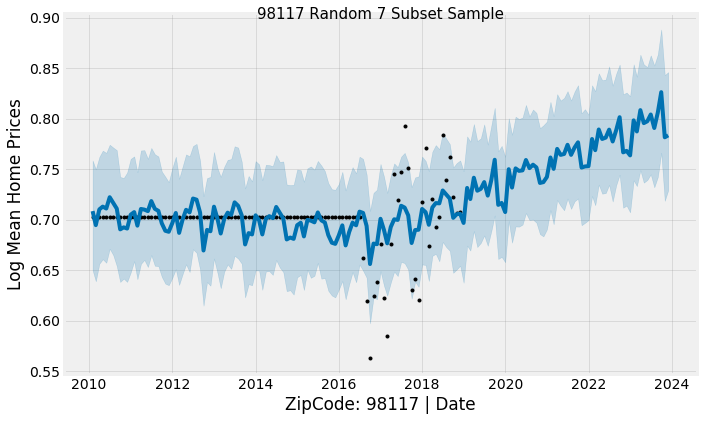

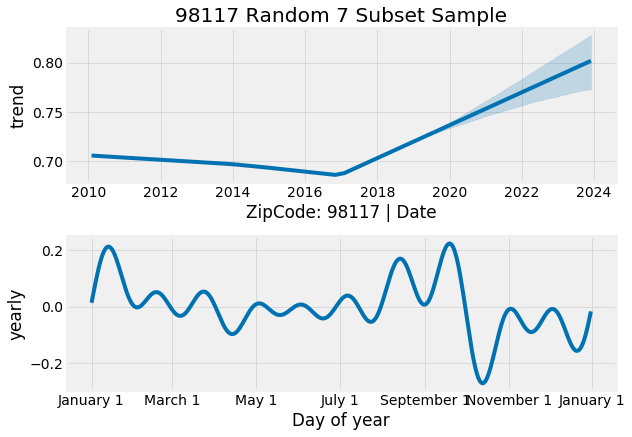

<Figure size 1440x1080 with 0 Axes>

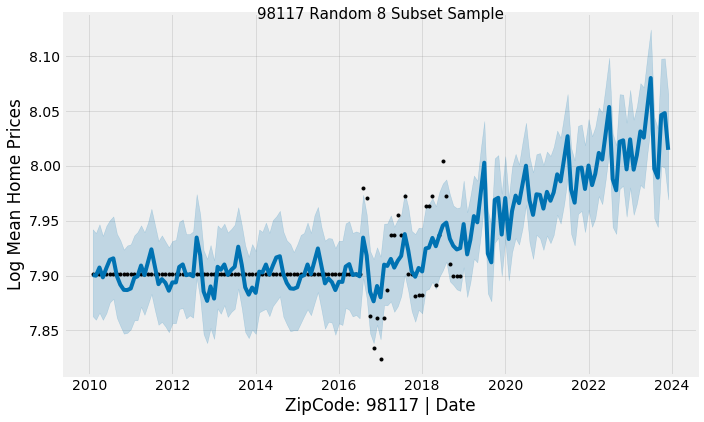

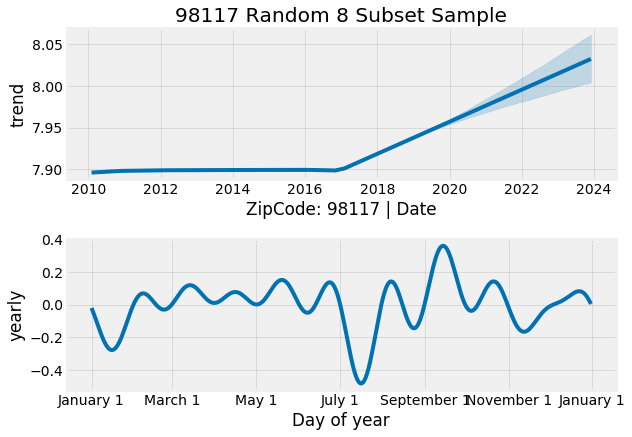

<Figure size 1440x1080 with 0 Axes>

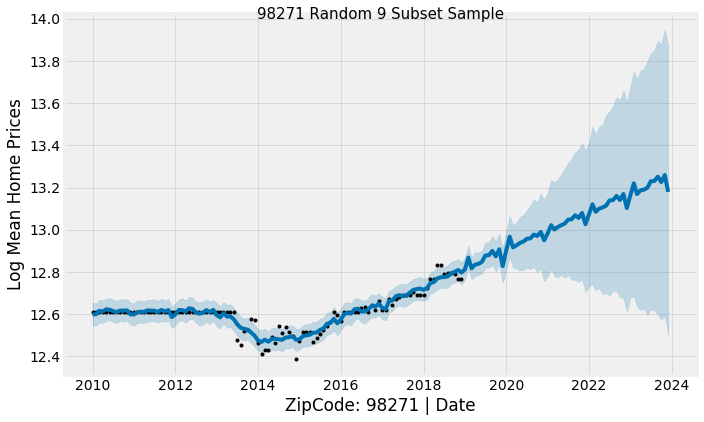

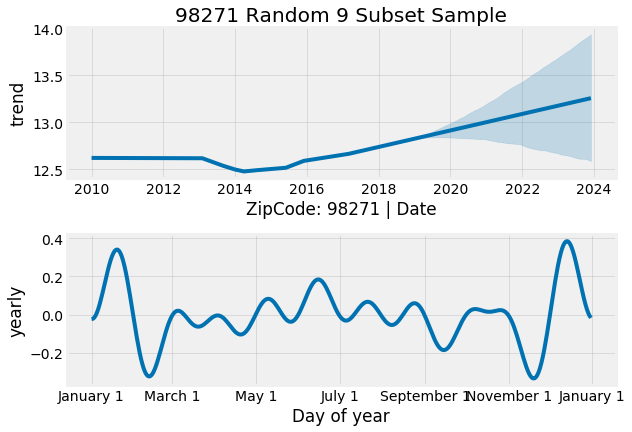

In [133]:
# pull in forecast samples
ran_zips = np.random.choice(re_datasets['Single_Family_Residence'].ZipCode,10,replace=False)
zipcode_eval = [] # 
i = 0
m_fit = None
m_forecast = None

for data_key in re_datasets.keys():

    for z in ran_zips:
        try:
            fitFile = f'{modelDir}/{future5Dir}/{data_key}/{z}_fit'
            forecastFile = f'{modelDir}/{future5Dir}/{data_key}/{z}_forecast'

            with open(fitFile,'rb') as f:
                m_fit = pickle.load(f)
                logger.debug(f'saved pickled timeseries model [{fitFile}] dataset found...')

            with open(forecastFile,'rb') as f:
                m_forecast = pickle.load(f)
                logger.debug(f'saved pickled timeseries model [{forecastFile}] dataset found...')

            
            brs.plotFit(z,m_fit,m_forecast,f'{z} Random {str(i+1)} Subset Sample',f'{imageDir}/{future5Dir}/{data_key}/')
            i = i+1
            if i >= 5: break

        except FileNotFoundError:
            logger.debug('file not found...')
        

In [134]:
from fbprophet.diagnostics import cross_validation, performance_metrics
df_cv = cross_validation(m_fit, horizon='90 days')

df_p = performance_metrics(df_cv)

INFO:fbprophet:Making 63 forecasts with cutoffs between 2011-01-12 00:00:00 and 2018-09-02 00:00:00
INFO:fbprophet:n_changepoints greater than number of observations.Using 9.
INFO:fbprophet:n_changepoints greater than number of observations.Using 10.
INFO:fbprophet:n_changepoints greater than number of observations.Using 11.
INFO:fbprophet:n_changepoints greater than number of observations.Using 12.
INFO:fbprophet:n_changepoints greater than number of observations.Using 14.
INFO:fbprophet:n_changepoints greater than number of observations.Using 15.
INFO:fbprophet:n_changepoints greater than number of observations.Using 16.
INFO:fbprophet:n_changepoints greater than number of observations.Using 17.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 19.
INFO:fbprophet:n_changepoints greater than number of observations.Using 21.
INFO:fbprophet:n_changepoints greater than number of observations

##### Timeseries Models Performance Metrics - 90 days Horizon

In [136]:
# save df as new data source
save_as = f'{dataDir}/prophet_cross_fold_diagnostics.csv'
df_p.to_csv(save_as,index=False)
df_p.head(5)

,horizon,mse,rmse,mae,mape,coverage
0,9 days,0.003058,0.055295,0.034677,0.002765,0.722222
1,10 days,0.002039,0.045157,0.027378,0.002181,0.777778
2,11 days,0.002459,0.049593,0.030191,0.002397,0.777778
3,12 days,0.002257,0.047510,0.029036,0.002303,0.805556
4,13 days,0.001648,0.040594,0.024076,0.001906,0.888889


##### Timeseries Models Cross Validation Metric Mape - 90 day Horizon**

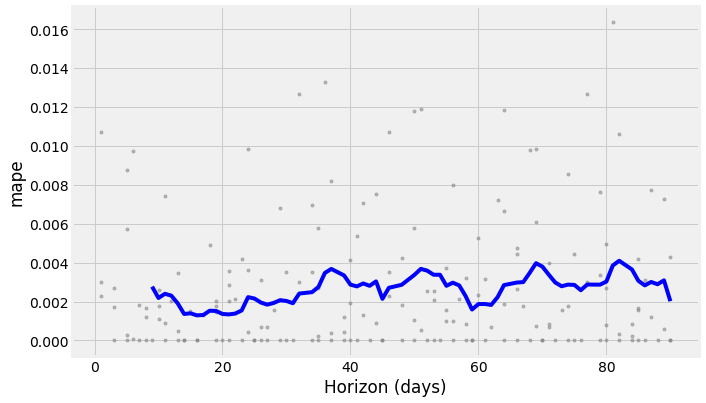

In [138]:
from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(df_cv, metric='mape')

# 3. Clustering 
**-------------------------------------------------------------------------------------------------**
* K-means - unsupervised   
* Mean-Shift - unsupervised   
  
Description: Run k-means for three choices for k and choose the best.   
**A loop of 10 iterations were ran of the zipecode models generated from the Timeseries process ran above. Based on the output of the Elbow technique K=4 was the best chosen choose.**<br>

Intent: Try and use unsupervised learing techniques to classify Timeseries models produced by prophet.<br>
Which are the best forecasters?<br>
- Try and group into 3 classes using unsupervised learning
- Focus on single familey homes<br>

## 3.1 K-means Clustering
Python package: scikit-learn v0.21.3 [sklearn.cluster.KMeans](https://scikit-learn.org/stable/modules/generated/sklearn.cluster.KMeans.html#sklearn.cluster.KMeans)  

Description: ...

## 3.1.1 Analysis

In [139]:
modelsPerformance = {'ModelName':[], 'TestAccuracyScore':[],'PredictAccuracyScore':[] ,'FitTime':[], 'ScoreTime':[], 'PredictTime':[]}

In [142]:
# which are the best forecasters - try and group into 3 classes using unsupervised learning
# focus on single familey homes
zipcodes = re_datasets['Single_Family_Residence'].ZipCode
data_key = 'Single_Family_Residence'
zip_ts_forcasts = {}

# get zip forcasts
for z in zipcodes:
    forecastFile = f'{modelDir}/{future5Dir}/{data_key}/{z}_forecast'

    with open(forecastFile,'rb') as f:
            m_forcast = pickle.load(f)
            zip_ts_forcasts[z] = m_forcast
            logger.debug(f'saved pickled timeseries model [{forecastFile}] dataset found...')
                

## 3.1.2 Exploration
Get all of the zip code forecast prediction models that generated in section 2 from disc, and prep for kmeans

In [143]:
# get all of the zip code forecast predictions and prep for kmea

zip_forecasts = None
i = 0
for k,v in zip_ts_forcasts.items(): #351
    p = zip_ts_forcasts[k]
    #p = p.drop(columns=['ds']) #drop the date field, adds no value for clustering, and kmeans wants to convert it to a float
    p['ZipCode'] = k
    if i == 0:
        zip_forecasts = p
    else:
        zip_forecasts = pd.concat([zip_forecasts,p])
    i=i+1

#save data off as new data object file
rt.save_df(zip_forecasts, f'{dataDir}/wa_sfh_zip_forecasts.pkl',logger)


In [144]:
logger.debug(f'unique zipcodes {zip_forecasts.ZipCode.unique()}\n')
logger.debug(f'wa single family home, zipcode predicted forecast dataset:\n{zip_forecasts.info()}')

<class 'pandas.core.frame.DataFrame'>
Int64Index: 113724 entries, 0 to 323
Data columns (total 17 columns):
ds                            113724 non-null datetime64[ns]
trend                         113724 non-null float64
yhat_lower                    113724 non-null float64
yhat_upper                    113724 non-null float64
trend_lower                   113724 non-null float64
trend_upper                   113724 non-null float64
additive_terms                113724 non-null float64
additive_terms_lower          113724 non-null float64
additive_terms_upper          113724 non-null float64
yearly                        113724 non-null float64
yearly_lower                  113724 non-null float64
yearly_upper                  113724 non-null float64
multiplicative_terms          113724 non-null float64
multiplicative_terms_lower    113724 non-null float64
multiplicative_terms_upper    113724 non-null float64
yhat                          113724 non-null float64
ZipCode              

In [145]:
zip_forecasts.tail()

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat,ZipCode
319,2023-07-31,13.155514,11.837246,14.674990,11.853864,14.682746,-0.007654,-0.007654,-0.007654,-0.007654,-0.007654,-0.007654,0.0,0.0,0.0,13.147859,98925
320,2023-08-31,13.161885,11.835639,14.753381,11.823744,14.737809,-0.003536,-0.003536,-0.003536,-0.003536,-0.003536,-0.003536,0.0,0.0,0.0,13.158349,98925
321,2023-09-30,13.168051,11.815777,14.783577,11.801436,14.793408,0.007843,0.007843,0.007843,0.007843,0.007843,0.007843,0.0,0.0,0.0,13.175894,98925
322,2023-10-31,13.174423,11.787066,14.854134,11.784665,14.850861,0.012167,0.012167,0.012167,0.012167,0.012167,0.012167,0.0,0.0,0.0,13.186590,98925
323,2023-11-30,13.180589,11.754081,14.922188,11.741391,14.906460,0.006648,0.006648,0.006648,0.006648,0.006648,0.006648,0.0,0.0,0.0,13.187237,98925


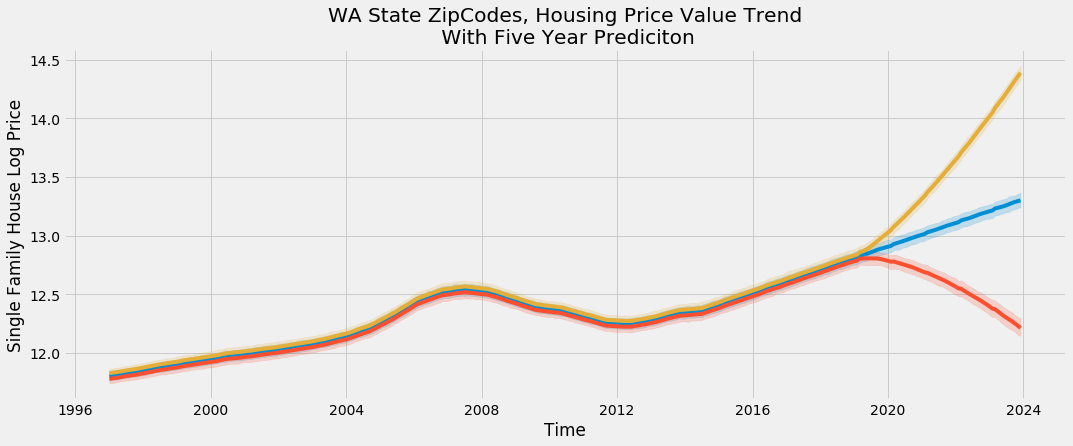

In [146]:
plt.figure(figsize=(16,6))
sns.lineplot(x='ds', y='yhat', data=zip_forecasts)
sns.lineplot(x='ds', y='yhat_lower', data=zip_forecasts)
sns.lineplot(x='ds', y='yhat_upper', data=zip_forecasts)
plt.title('WA State ZipCodes, Housing Price Value Trend\n With Five Year Prediciton')
plt.xlabel('Time')
plt.ylabel('Single Family House Log Price')
plt.show()

In [147]:
# limite the features for clustering - and the observations to just the predition time (5 years) + one year observed
trend_cols = ['trend','trend_lower','trend_upper']
future_price_yhat_cols = ['yhat','yhat_lower','yhat_upper']
X_zip_forecast = zip_forecasts[['ds','ZipCode','yhat','yhat_lower','yhat_upper','trend','trend_lower','trend_upper']]
X_zip_forecast.tail()
#  - keep all the data this round
end_date = X_zip_forecast.iloc[-1].ds
start_date = pd.to_datetime('2018-01-01')
mask = (X_zip_forecast.ds >= start_date) & (X_zip_forecast.ds <= end_date)
X_zip = X_zip_forecast[mask]
X_zip.head()
X_zip_forecast.head()

# save this formate
# save df as new data source
save_as = f'{dataDir}/sfr_yhat_forecast.csv'
X_zip_forecast.to_csv(save_as,index=False)

#### Clean the forecast dataset for clustering
* limite the features for clustering - and the observations to just the predition time (5 years) + one year observed 
* remove additive terms and multiplicative terms as well as the datetimestamp
* save series objects for later re joining

In [149]:
# clean the forecast dataset for clustering
# remove additive terms and multiplicative terms as well as the datetimestamp
# save series objects for later re joining
X_zip_zipcodes = X_zip['ZipCode']
X_zip_ds = X_zip['ds']
X_zip_clust = X_zip.drop(columns=['ds','ZipCode'])
X_zip_forecast_t = X_zip_forecast.drop(columns=['ds','ZipCode'])
#logger.info(f'wa single family home, modified zipcode predicted forecast dataset:\n{X_zip_forecast_t.info()}')

X_zip_clust_features = X_zip_clust.columns

In [150]:
X_zip.head()

,ds,ZipCode,yhat,yhat_lower,yhat_upper,trend,trend_lower,trend_upper
252,2018-01-01,98052,13.675667,13.655640,13.696859,13.673974,13.673974,13.673974
253,2018-02-01,98052,13.685759,13.666272,13.705942,13.683988,13.683988,13.683988
254,2018-03-01,98052,13.695788,13.676042,13.716392,13.693034,13.693034,13.693034
255,2018-04-01,98052,13.705396,13.683485,13.724888,13.703048,13.703048,13.703048
256,2018-05-01,98052,13.715385,13.695982,13.736280,13.712740,13.712740,13.712740


#### Pull in generated datasets for modeling...
* Economic Date - economic_forecast_date_norm.csv  --- economic factors per date
* Real Esate Date - sfr_price_zip.csv --- single family homes price value per zipcode and date

In [151]:
# pull in generated datasets for modeling...
# Economic Date - economic_forecast_date_norm.csv  --- economic factors per date
# Real Esate Date - sfr_price_zip.csv --- single family homes price value per zipcode and date
economic_norm_data = 'economic_forecast_data_norm.csv'
realestate_sfr_prices = 'sfr_price_zip.csv'

economic_norm_data = pd.read_csv(f'{dataDir}/{economic_norm_data}', error_bad_lines=False, encoding = "ISO-8859-1")
realestate_sfr_prices = pd.read_csv(f'{dataDir}/{realestate_sfr_prices}', error_bad_lines=False, encoding = "ISO-8859-1")

logger.info(f'economic_norm_date shape: {economic_norm_data.shape}')
logger.info(f'realestate_sfr_prices shape: {realestate_sfr_prices.shape}')

INFO:file_logger:economic_norm_date shape: (261, 11)
INFO:file_logger:realestate_sfr_prices shape: (264, 352)


In [152]:
realestate_sfr_prices.head()

,Date,98052,98012,99301,98103,98682,98115,98122,98133,99208,...,98547,99110,99116,98645,99123,98358,98351,98279,98940,98925
0,1997-01-01,229300.0,199500.0,88700.0,183800.0,131100.0,191700.0,175800.0,155400.0,117000.0,...,90200.0,124400.0,52700.0,120900.0,66000.0,203400.0,138800.0,202100.0,131000.0,136200.0
1,1997-02-01,231400.0,200700.0,88600.0,185500.0,131400.0,193500.0,177300.0,156300.0,117300.0,...,90100.0,124400.0,52500.0,121600.0,66300.0,204000.0,138700.0,203500.0,131400.0,136400.0
2,1997-03-01,233500.0,202000.0,88400.0,187200.0,131500.0,195200.0,178700.0,157100.0,117700.0,...,90100.0,124400.0,52200.0,122100.0,66500.0,204300.0,138700.0,204800.0,131600.0,136600.0
3,1997-04-01,235600.0,203300.0,88000.0,189100.0,131400.0,197000.0,180500.0,158100.0,118100.0,...,90000.0,124400.0,51900.0,122500.0,66700.0,204600.0,138700.0,206100.0,131900.0,136900.0
4,1997-05-01,237800.0,204600.0,87500.0,191200.0,131100.0,198800.0,182400.0,159100.0,118400.0,...,89900.0,124400.0,51600.0,122700.0,67000.0,204700.0,138800.0,207500.0,132300.0,137300.0


In [153]:
economic_norm_data['Date'] = pd.to_datetime(economic_norm_data['Date'])
economic_norm_data['Date'] = pd.to_datetime(economic_norm_data['Date'].dt.strftime('%Y-%m-%d'))
economic_norm_data.head()

,Date,CPI_Index_Avg_f,Interest_Rate_f,Housing_Price_Index_f,Bond_Yeild_10y_f,Inflation_f,GDP_f,Population_f,House_Hold_Income_f,Employment_f,Cash_Surp_Def_f
0,1997-01-01,157.959370,4.814434,83.076214,6.055381,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
1,1997-02-01,158.404761,4.731693,83.392929,6.015761,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
2,1997-03-01,158.947674,4.633084,82.836534,6.073349,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
3,1997-04-01,159.387626,4.378458,83.893792,6.079290,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
4,1997-05-01,159.765440,4.652420,85.006970,6.126489,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803


## 3.1.3 Model - KMeans
* Run multiple k means to determin optimal k size for final model creation
    * 8 iterations were ran, where k 4 was the most optimal

In [154]:
#from sklearn.cluster import KMeans, SpectralClustering
#from sklearn.preprocessing import StandardScaler
#from sklearn.metrics import silhouette_samples, silhouette_score

def build_kmeans(n_clusters,random_state,n_jobs,verbose=0):
    km = KMeans(
        n_clusters=n_clusters, 
        init="k-means++", # using elbow to figure out k for kmeans
        n_init=10, 
        max_iter=300, 
        tol=0.0001, 
        precompute_distances="auto", 
        verbose=verbose, 
        random_state=random_state, # determines random number generation for centroid initialization, Use an int to make the randomness deterministic, (i.e. running it multiple times will produce the same result)
        copy_x=True, 
        n_jobs=n_jobs, 
        algorithm="auto")
    
    return km

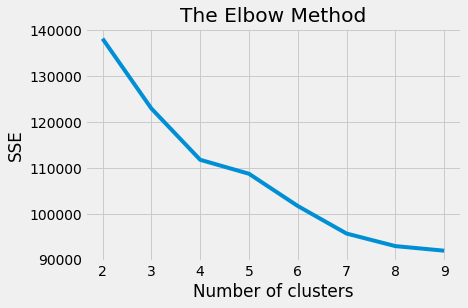

In [155]:
#%%time
# Run multiple k means to determin optimal k size for final model creation

sse = {} # store output for analysis
# set range from 2 - 10, assum max number of clusters to be 10
for k in range(2,10):
    km = build_kmeans(n_clusters=k,random_state=0,n_jobs=None)
    X_std = km.fit_transform(X_zip_forecast_t) #X_zip_forecast_t X_zip_clust
    kmeans = km.fit(X_std)
    sse[k] = kmeans.inertia_ # Inertia: sum of distances of samples to their closest cluster center

# plot elbow    
plt.figure()
plt.plot(list(sse.keys()), list(sse.values()))
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('SSE')
plt.show()

In [156]:
logger.debug(f'kmeans class labels... {kmeans.labels_}')
logger.debug(f'kmeans parameters... {kmeans.get_params()}')
logger.debug(f'sse out analysis, multiple k-means trials\n: {list(sse.keys()), list(sse.values())}')

##### Build KMeans based on ideal cluster state found by Elbow method - 4

In [157]:
# build KMeans based on ideal cluster state found above - 4

# build with k=4 clusters
km_model = build_kmeans(n_clusters=4,random_state=0,n_jobs=None)
y_kmeans = km_model.fit_predict(X_std) # for unsupervised learning - use fit_predict()
# add clusters to the data
#X_zip['label'] = y_kmeans
X_zip_forecast['label'] = y_kmeans
#save off labeled dataframe
rt.save_df(X_zip_forecast,f'{dataDir}/labeled_wa_sfa_predicted_future_home_price.pkl',logger)

logger.debug(f'km_model.labels_ ... {km_model.labels_}')
logger.debug(f'km_model.cluster_centers_ ... {km_model.cluster_centers_}')

## 3.1.4 Results
Rusulting Cluster Classification at K equal 4

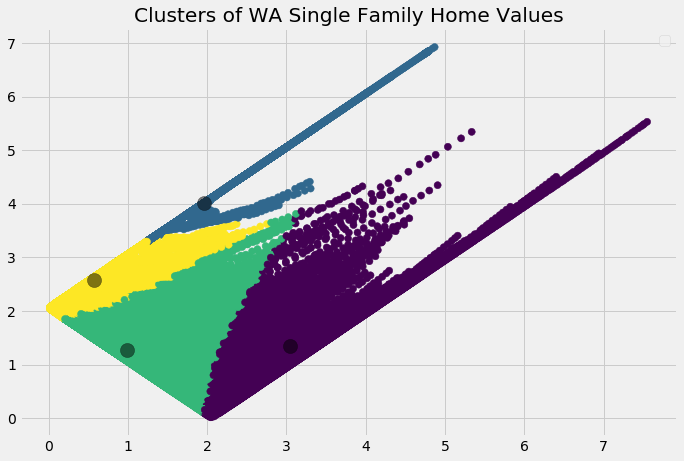

In [158]:
plt.figure(figsize=(10.5,7))
plt.scatter(X_std[:,0], X_std[:,1], c=y_kmeans, s=50, cmap='viridis')
centers = km_model.cluster_centers_
plt.scatter(centers[:,0], centers[:,1], c='black', s=200, alpha=0.5)
plt.title('Clusters of WA Single Family Home Values')
plt.xlabel('')
plt.ylabel('')
plt.legend()
plt.show()


# 4. Decision Tree
**-------------------------------------------------------------------------------------------------**
* Decision Tree - supervised   
    * Include three different trees and their visualizations     
    
Python package: [scikit-learn sklearn.tree.DecisionTreeClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.tree.DecisionTreeClassifier.html)  
    
*Build a decision tree model.     

## 4.1 Analysis
* Transformation of the data's necessary to merge the datasets together after processed through prophet.
* Look over the distribution of key features
* Set price thresholds for supervised learning classification
* Price_Point_Class is a generated feature for supervised classification. Details are shown below

In [170]:
#X_zip_forecast.tail()

#### transform this data set to be in the shape: columns are zip codes, yhat is the value as prices, date

In [160]:
sfr_forecast = X_zip_forecast[['ds','ZipCode','yhat']]
sfr_forecast = sfr_forecast.rename(columns={'ds':'Date'})
sfr_forecast['Date'] = pd.to_datetime(sfr_forecast['Date'])
sfr_forecast = sfr_forecast.set_index('Date')
#sfr_forecast = sfr_forecast.rename(columns={'yhat':''})
# pivot dataframe, spread rows into columns
sfr_forecast = sfr_forecast.pivot(columns='ZipCode', values='yhat')
sfr_forecast = sfr_forecast.reset_index()
sfr_forecast['Date'] = pd.to_datetime(sfr_forecast['Date'])
# save as csv
# save df as new data source
save_as = f'{dataDir}/sfr_forecast.csv'
sfr_forecast.to_csv(save_as,index=False)
sfr_forecast.head(5)

ZipCode,Date,98001,98002,98003,98004,98005,98006,98007,98008,98010,...,99337,99338,99344,99350,99352,99354,99361,99362,99402,99403
0,1997-01-01,11.873703,11.731146,11.854656,12.930965,12.434717,12.474191,12.147111,12.187699,12.100868,...,11.607961,11.808275,11.302662,11.412574,12.267869,11.645123,11.061982,11.393103,11.681808,11.540404
1,1997-02-01,11.880200,11.735203,11.860957,12.941784,12.446799,12.486282,12.159336,12.199421,12.106584,...,11.604232,11.801265,11.302366,11.407532,12.266522,11.637577,11.078486,11.399724,11.678911,11.538588
2,1997-03-01,11.884774,11.735696,11.865059,12.947822,12.452669,12.491204,12.164220,12.204814,12.105805,...,11.599673,11.794473,11.301875,11.403003,12.263442,11.622044,11.088940,11.402699,11.674911,11.532024
3,1997-04-01,11.891682,11.740681,11.871427,12.957818,12.464837,12.503393,12.176328,12.216992,12.111312,...,11.596147,11.788207,11.300791,11.399132,12.262687,11.612780,11.105205,11.409327,11.670993,11.530394
4,1997-05-01,11.898385,11.745872,11.877825,12.967831,12.476572,12.515002,12.187934,12.228859,12.116402,...,11.593500,11.782662,11.300135,11.396320,12.263276,11.604399,11.121067,11.415902,11.667330,11.528652


In [161]:
# read file backin
sfr_forecast = 'sfr_forecast.csv'
sfr_forecast = pd.read_csv(f'{dataDir}/sfr_forecast.csv')
sfr_forecast['Date'] = pd.to_datetime(sfr_forecast['Date'])
#sfr_forecast.head()

In [162]:
wa_sfr_forecast_long = 'wa_sfr_forecast_long_log.csv'
wa_sfr_forecast_long = pd.read_csv(f'{dataDir}/wa_sfr_forecast_long.csv')
wa_sfr_forecast_long['Date'] = pd.to_datetime(wa_sfr_forecast_long['Date'])
#wa_sfr_forecast_long.shape

In [163]:
#wa_sfr_forecast_long.head()

In [164]:
wa_sfr_forecast_long['log_Price_Monthly_Avg'] = wa_sfr_forecast_long.log_Price_Monthly_Avg.fillna(method='ffill')
## save df as new data source
#save_as = f'{dataDir}/wa_sfr_forecast_long_log.csv'
#wa_sfr_forecast_long.to_csv(save_as,index=False)

In [165]:
wa_sfr_forecast_long['log_Price_diff'] = wa_sfr_forecast_long.log_Price_Monthly_Avg.sub(wa_sfr_forecast_long.log_Price, axis = 0)


In [166]:
#wa_sfr_forecast_long.head()

In [167]:
#wa_sfr_forecast_long.log_Price_diff.describe()

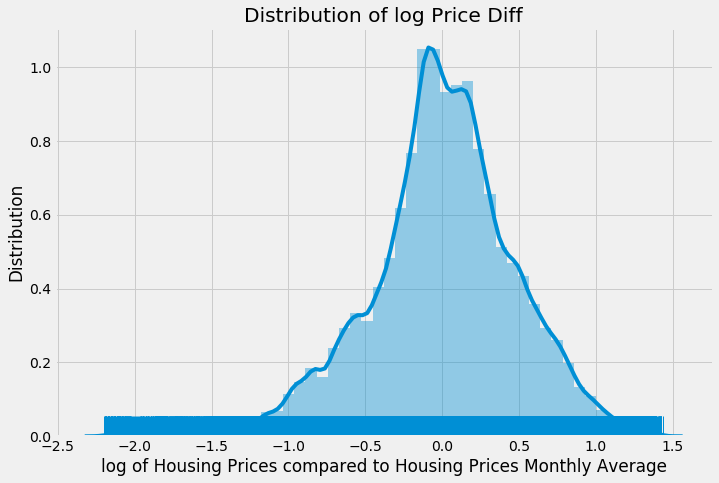

In [168]:
plt.figure(figsize=(10.5,7))
sns.distplot(wa_sfr_forecast_long.log_Price_diff, hist=True, rug=True)
plt.title('Distribution of log Price Diff')
plt.ylabel('Distribution')
plt.xlabel('log of Housing Prices compared to Housing Prices Monthly Average')
plt.show()

In [169]:
threshold_low = wa_sfr_forecast_long.log_Price_diff.describe()[4] #25%
threshold_neutral = wa_sfr_forecast_long.log_Price_diff.describe()[5] #50#
threshold_high = wa_sfr_forecast_long.log_Price_diff.describe()[6]
threshold_high_x = threshold_high + (threshold_high/4)
threshold_high_mid = threshold_high - (threshold_high/2)
logger.info(f'threshold_low [{threshold_low}] | threshold_neutral [{threshold_neutral}] | threshold_high [{threshold_high}] | threshold_high_x [{threshold_high_x}] | \
            threshold_high_mid [{threshold_high_mid}]')


INFO:file_logger:threshold_low [-0.25401387500000006] | threshold_neutral [0.010042959999999823] | threshold_high [0.29538362500000037] | threshold_high_x [0.36922953125000046] |             threshold_high_mid [0.14769181250000019]


In [171]:
wa_sfr_forecast_long['Price_Point_Class'] = wa_sfr_forecast_long.log_Price_diff.apply(
    lambda x: 0 if x <= threshold_low else (1 if x <= threshold_high_mid else 2))

# save df as new data source
save_as = f'{dataDir}/wa_sfr_forecast_long_log_final.csv'
wa_sfr_forecast_long.to_csv(save_as,index=False)

wa_sfr_forecast_long.head()

,Date,ZipCode,log_Price,log_Price_Monthly_Avg,log_Price_diff,Price_Point_Class
0,1997-01-01,98052,12.342486,11.804569,-0.537917,0
1,1997-02-01,98052,12.352806,11.808970,-0.543837,0
2,1997-03-01,98052,12.357526,11.811044,-0.546482,0
3,1997-04-01,98052,12.367903,11.815443,-0.552460,0
4,1997-05-01,98052,12.378131,11.819842,-0.558289,0


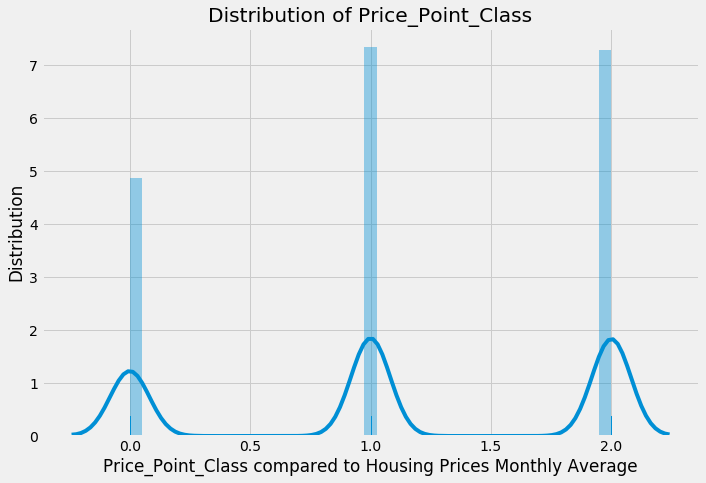

In [172]:
plt.figure(figsize=(10.5,7))
sns.distplot(wa_sfr_forecast_long.Price_Point_Class, hist=True, rug=True)
plt.title('Distribution of Price_Point_Class')
plt.ylabel('Distribution')
plt.xlabel('Price_Point_Class compared to Housing Prices Monthly Average')
plt.show()

In [173]:
# read zip data back in after transformation completed above
wa_sfr_forecast_long = 'wa_sfr_forecast_long_log_final.csv'
wa_sfr_forecast_long = pd.read_csv(f'{dataDir}/{wa_sfr_forecast_long}')
wa_sfr_forecast_long['Date'] = pd.to_datetime(wa_sfr_forecast_long['Date'])
#wa_sfr_forecast_long.shape
#wa_sfr_forecast_long.duplicated().sum()

In [174]:
#wa_sfr_forecast_long.tail()

In [175]:
# merge economic data set / features with zipcode to create final dataset to be modeled and tested on
# read zip data back in after transformation completed above
economic_forecast_ = 'economic_forecast_data_clean.csv'
economic_forecast_ = pd.read_csv(f'{dataDir}/{economic_forecast_}')
economic_forecast_['Date'] = pd.to_datetime(economic_forecast_['Date'])
#economic_forecast_.shape

In [177]:
#economic_forecast_.Date[economic_forecast_.Date.duplicated()]

In [176]:
#economic_forecast_.tail()

In [179]:
zips = list(wa_sfr_forecast_long.ZipCode.unique())
economic_df_chunks = {}
#chunk_cnt = wa_sfr_forecast_long.shape[0]
for z in zips:
    economic_df_chunks[z] = economic_forecast_.copy()
    #print(z)

#len(economic_df_chunks)


351

In [180]:
econ = None
for k,v in economic_df_chunks.items():
    #print(k)
    #print(v.shape)
    
    p = economic_df_chunks[k]
    if i == 0:
        econ = p
    else:
        econ = pd.concat([econ,p])
    
    i=i+1

econ = econ.reset_index()
econ = econ.drop(columns=['index'])
#econ.shape    

In [182]:
end_date = pd.to_datetime('2017-12-31')
mask = (wa_sfr_forecast_long.Date <= end_date) # & (wa_sfr_forecast_long.ds <= end_date)
wa_sfr_forecast_long_filt = wa_sfr_forecast_long[mask]

mask = (econ.Date <= end_date) # & (wa_sfr_forecast_long.ds <= end_date)
econ_filt = econ[mask]

#wa_sfr_forecast_long_filt.shape # (105651, 6)
#econ_filt.shape

In [183]:
save_as = f'{dataDir}/econ_filt.csv'
econ_filt.to_csv(save_as,index=False)

save_as = f'{dataDir}/wa_sfr_forecast_long_filt.csv'
wa_sfr_forecast_long_filt.to_csv(save_as,index=False)

## Final Merged Dataset - Real Estate Combined with Economic Data Features
*Time range - 1997 - 2017 (that was the cleanest that could be achieved at this time...*   
*Train classifiers on Feature 'Price_Point_Class'
* 0: means observation's price value is < 25% of the State Price Average
* 1: means observations fall within the normal (average) range of the State Price Average
* 2: means observations falls above the 75% range of the State Price Average

--Determin if classifiers can identify future home value classes based on prior date, location and economic features that have the most impact on both postive and negative price value swings...   

* Dataset Shape: (88452, 16)

In [184]:
modelsPerformance = {'ModelName':[], 'TestAccuracyScore':[],'PredictAccuracyScore':[] ,'FitTime':[], 'ScoreTime':[], 'PredictTime':[]}

In [185]:
# get final dataset for modeling
zip_eco_combo_final = 'zip_eco_combo_final.csv'
zip_eco_combo_final = pd.read_csv(f'{dataDir}/{zip_eco_combo_final}')
zip_eco_combo_final['Date'] = pd.to_datetime(zip_eco_combo_final['Date'])
#logger.info(f'zip_eco_combo_final shape: {zip_eco_combo_final.shape}')

In [186]:
zip_eco_combo_final.head()

,Date,ZipCode,log_Price,log_Price_Monthly_Avg,log_Price_diff,Price_Point_Class,CPI_Index_Avg_f,Interest_Rate_f,Housing_Price_Index_f,Bond_Yeild_10y_f,Inflation_f,GDP_f,Population_f,House_Hold_Income_f,Employment_f,Cash_Surp_Def_f
0,1997-01-01,98052,12.342486,11.804569,-0.537918,0,157.959370,4.814434,83.076214,6.055381,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
1,1997-02-01,98052,12.352806,11.808970,-0.543837,0,158.404761,4.731693,83.392929,6.015761,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
2,1997-03-01,98052,12.357526,11.811044,-0.546482,0,158.947674,4.633084,82.836534,6.073349,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
3,1997-04-01,98052,12.367903,11.815443,-0.552460,0,159.387626,4.378458,83.893792,6.079290,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803
4,1997-05-01,98052,12.378131,11.819842,-0.558289,0,159.765440,4.652420,85.006970,6.126489,2.812443,8577.554463,272639888.8,11.537125,11.767443,-3.733803


## 4.2 Exploration

In [187]:
#plt.figure(figsize=(10.5,7))
#vis = sns.distplot(zip_eco_combo_final.Price_Point_Class, hist=True, rug=True)
#plt.title('Distribution of Price_Point_Class')
#plt.ylabel('Distribution')
#plt.xlabel('Price_Point_Class compared to Housing Prices Monthly Average')
#plt.savefig(f'{imageDir}/dist_of_price_point_class.png', dpi=300)
#plt.show()

# save visual
#report_plots['Dist_Price_Points'] = vis

<Figure size 576x432 with 0 Axes>

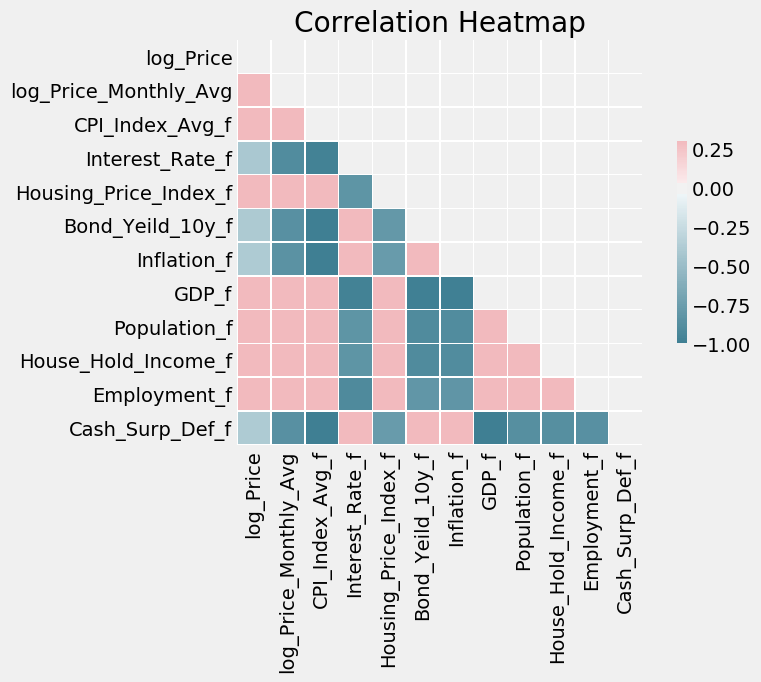

<Figure size 432x288 with 0 Axes>

In [188]:
plt.figure(figsize=(8,6))
rt.plot_corr_heatmap(zip_eco_combo_final,zip_eco_combo_final.drop(columns=['Date','ZipCode','log_Price_diff','Price_Point_Class']).columns)
plt.savefig(f'{imageDir}/zip_eco_combo_corr.png', dpi=300)

In [191]:
logger.debug(f'zip_eco_combo_final columns:\n{zip_eco_combo_final.columns}')
ze = zip_eco_combo_final[['Date','Price_Point_Class','ZipCode','log_Price','log_Price_Monthly_Avg','log_Price_diff','CPI_Index_Avg_f',
       'Interest_Rate_f', 'Housing_Price_Index_f', 'Bond_Yeild_10y_f',
       'Inflation_f', 'GDP_f', 'Population_f', 'House_Hold_Income_f',
       'Employment_f', 'Cash_Surp_Def_f']]

In [192]:
modelsPerformance = {'ModelName':[], 'TestAccuracyScore':[],'PredictAccuracyScore':[] ,'FitTime':[], 'ScoreTime':[], 'PredictTime':[]}

In [193]:
# dataset normalization & transformation
features = ['Date','ZipCode','log_CPI_Index_Avg_f', 'log_Interest_Rate_f', 
            'log_Bond_Yeild_10y_f','log_Inflation_f', 'log_GDP_f', 'log_Population_f', 'House_Hold_Income_f','Employment_f', 
            'Cash_Surp_Def_f']

drop_cols_modeling = ['Price_Point_Class','log_Price_diff','log_Price','log_Price_Monthly_Avg','Housing_Price_Index_f',
                      'Population_f','GDP_f','CPI_Index_Avg_f','Interest_Rate_f',
                     'Bond_Yeild_10y_f','Inflation_f']

# do a little zscore normalization
ze.Price_Point_Class = ze.Price_Point_Class.astype('category')
#ze['Date'] = ze.Date.astype('category')
ze['ZipCode'] = ze.ZipCode.astype('category')
ze['log_Population_f'] = np.log(ze.Population_f)
ze['log_GDP_f'] = np.log(ze.GDP_f)
#ze['log_House_Hold_Income_f'] = np.log(ze.House_Hold_Income_f)
#ze['log_Employment_f'] = np.log(ze.Employment_f)
ze['log_CPI_Index_Avg_f'] = np.log(ze.CPI_Index_Avg_f)
ze['log_Interest_Rate_f'] = np.log(ze.Interest_Rate_f)
ze['log_Bond_Yeild_10y_f'] = np.log(ze.Bond_Yeild_10y_f)
ze['log_Inflation_f'] = np.log(ze.Inflation_f)
#ze['log_Cash_Surp_Def_f'] = np.log(ze.Cash_Surp_Def_f)

In [194]:
# hold out 2016 - 2017 for final test eval
start_date = pd.to_datetime('2016-01-01')
end_date = pd.to_datetime('2017-12-31')

# test set - future unseen
mask = (ze.Date >= start_date)  & (ze.Date <= end_date)
ze_2016_2017_test = ze[mask]

# train set
mask = (ze.Date <= start_date)#  & (ze.Date <= end_date)
ze_train = ze[mask]

logger.debug(f'ze_2016_2017_test shape: {ze_2016_2017_test.shape} | ze_train shape: {ze_train.shape}')

In [195]:
# set dates to be used as categories
ze_2016_2017_test['Date'] = ze_2016_2017_test.Date.astype('category')
ze_train['Date'] = ze_train.Date.astype('category')

In [196]:
#from sklearn.model_selection import train_test_split, cross_val_score
# create training test splicts


y = ze_train[['Price_Point_Class']]
X = ze_train.drop(columns=drop_cols_modeling)

y_test = ze_2016_2017_test[['Price_Point_Class']]
X_test = ze_2016_2017_test.drop(columns=drop_cols_modeling)

# cast as np arrays
X = np.asarray(X)
y = np.asarray(y)
X_test = np.asarray(X_test)
y_test = np.asarray(y_test)

# reduce memory
#X = X.astype(np.int32) # 
#y = y.astype(np.int32) #
#y_test = y_test.astype(np.int32)


# validation splits
X_train, X_val, y_train, y_val = train_test_split(X,y,test_size=0.33,random_state=42)

# test splits
#X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.33,random_state=42)

In [197]:
logger.debug(f'X_train shape: {X_train.shape} |  X_val shape: {X_val.shape} | X_test shape: {X_test.shape}')
logger.debug(f'y_train shape: {y_train.shape} |  y_val shape: {y_val.shape} | y_test shape: {y_test.shape}')

#### Look for imbalance in the sample observations for the target class

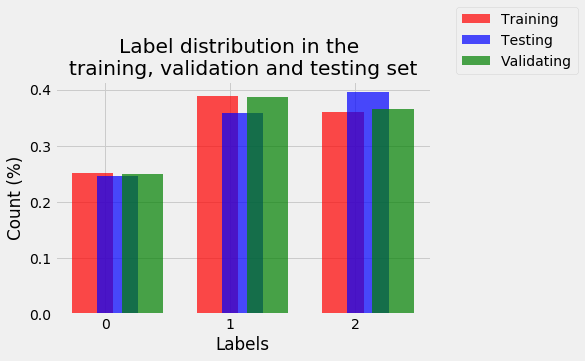

In [198]:
# number of label classes
n_classes = 3

# look for imbalance in the sample observations for the class
training_counts = [None] * n_classes
testing_counts = [None] * n_classes
validation_counts = [None] * n_classes

for i in range(n_classes):
    training_counts[i] = len(y_train[y_train == i])/len(y_train)
    testing_counts[i] = len(y_test[y_test == i])/len(y_test)
    validation_counts[i] = len(y_val[y_val == i])/len(y_val)

# plot histogram of the data
train_bar = plt.bar(np.arange(n_classes)-0.1, training_counts, align='center', color = 'r', alpha=0.70, width = 0.33, label='Training')
test_bar = plt.bar(np.arange(n_classes)+0.1, testing_counts, align='center', color = 'b', alpha=0.70, width = 0.33, label = 'Testing')
val_bar = plt.bar(np.arange(n_classes)+0.3, validation_counts, align='center', color = 'g', alpha=0.70, width = 0.33, label = 'Validating')


plt.xlabel('Labels')
plt.xticks((0,1,2))
plt.ylabel('Count (%)')
plt.title('Label distribution in the \ntraining, validation and testing set')
plt.legend(bbox_to_anchor=(1.05, 1), handles=[train_bar, test_bar, val_bar], loc=3)
plt.grid(True)
plt.savefig(f'{imageDir}/dt_explore_label_distribution.png', dpi=300)
plt.show()

In [199]:
# function used for clocking processing time to build/run models
from contextlib import contextmanager
from timeit import default_timer

@contextmanager
def elapsed_timer():
    start = default_timer()
    elapser = lambda: default_timer() - start
    yield lambda: elapser()
    end = default_timer()
    elapser = lambda: end-start

In [200]:
# Confusion matrix 
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize = False,
                          title = 'Confusion matrix',
                          cmap = plt.cm.Blues) :
    plt.imshow(cm, interpolation = 'nearest', cmap = cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation = 0)
    plt.yticks(tick_marks, classes)

    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])) :
        plt.text(j, i, cm[i, j],
                 horizontalalignment = 'center',
                 color = 'white' if cm[i, j] > thresh else 'black')
 
    #plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.savefig(f'{imageDir}/{model_name}_cm.png', dpi=150)
    plt.show()

## 4.3 Model - DecisionTree Classifier
* max_depth: None (default)
* min_samples_split: 2
* randome_state: 42

In [201]:
def build_tree(random_state,max_depth,min_samples_split):
    t = tree.DecisionTreeClassifier(
        criterion="gini", 
        splitter="best", 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=1, 
        min_weight_fraction_leaf=0.0, 
        max_features=None, 
        random_state=None, 
        max_leaf_nodes=None, 
        min_impurity_decrease=0.0, 
        min_impurity_split=None, 
        class_weight=None, 
        presort=False)
    
    return t

In [202]:
max_depth = None
min_samples_split = 2
with_zip = 'zip_true'
model_name = f'DecisionTree_{max_depth}_{min_samples_split}_{with_zip}'


dtc = build_tree(random_state=42,max_depth=max_depth,min_samples_split=min_samples_split)
t = 0.0
with elapsed_timer() as elapsed:
    # fit the forest to the training data
    dtc_fit = dtc.fit(X_train, y_train)
    t = elapsed()
    logger.info(f'DecisionTreeClassifier Model Build Time: [{t}]')

modelsPerformance['ModelName'].append(model_name)
modelsPerformance['FitTime'].append(t)

INFO:file_logger:DecisionTreeClassifier Model Build Time: [0.3555843000012828]


In [203]:
t = 0.0
with elapsed_timer() as elapsed:
    dtc_score =  dtc.score(X_val, y_val)
    t = elapsed()
    logger.info(f'DecisionTreeClassifier Model Fit Score: {[dtc_score]}')
    logger.info(f'DecisionTreeClassifier Model Fit Score Time: [{t}]')

modelsPerformance['TestAccuracyScore'].append(dtc_score)
modelsPerformance['ScoreTime'].append(elapsed())

INFO:file_logger:DecisionTreeClassifier Model Fit Score: [0.9914423584407751]
INFO:file_logger:DecisionTreeClassifier Model Fit Score Time: [0.039111999998567626]


In [204]:
#%%time
# predictions of test set split from training set
t = 0.0
with elapsed_timer() as elapsed:
    dtc_pred = dtc.predict(X_test)
    t = elapsed()
    logger.info(f'DecisionTreeClassifier Predict Time: [{t}]')

modelsPerformance['PredictTime'].append(t)

INFO:file_logger:DecisionTreeClassifier Predict Time: [0.003885100000843522]


## 4.4 Results

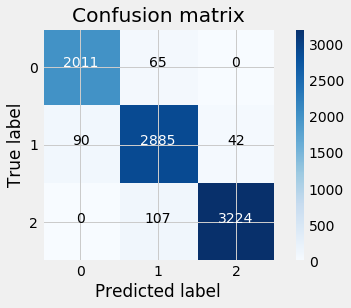

In [205]:
cm = confusion_matrix(y_test,dtc_pred, labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])


In [206]:
#print classification report table
n_classes=3
targetNames = ["Class{}".format(i) for i in range(n_classes)]
print(f'\n{classification_report(y_test, dtc_pred, target_names=targetNames)}')


              precision    recall  f1-score   support

      Class0       0.96      0.97      0.96      2076
      Class1       0.94      0.96      0.95      3017
      Class2       0.99      0.97      0.98      3331

   micro avg       0.96      0.96      0.96      8424
   macro avg       0.96      0.96      0.96      8424
weighted avg       0.96      0.96      0.96      8424



INFO:file_logger:                 feature  importance
1                ZipCode    0.856557
0                   Date    0.046343
7       log_Population_f    0.040113
9           Employment_f    0.019456
3    log_Interest_Rate_f    0.012984
2    log_CPI_Index_Avg_f    0.008199
5        log_Inflation_f    0.006408
8    House_Hold_Income_f    0.003751
4   log_Bond_Yeild_10y_f    0.002397
10       Cash_Surp_Def_f    0.001922


<Figure size 432x288 with 0 Axes>

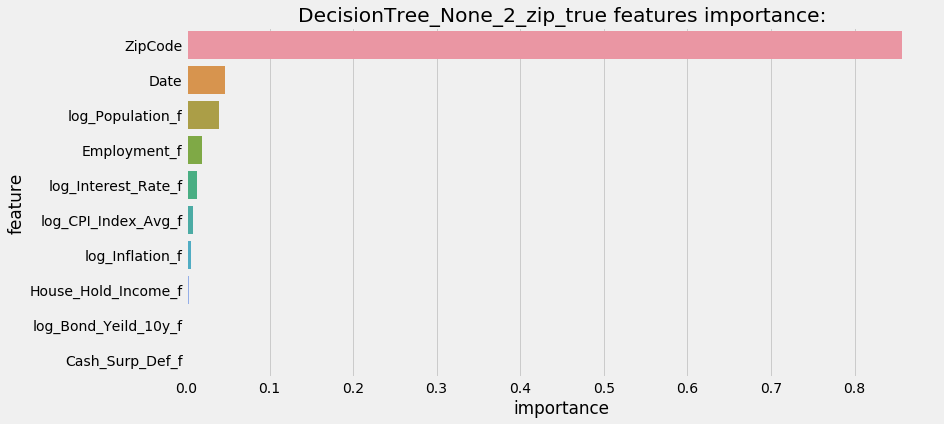

In [207]:
# Decision Tree - Feature importance
plt.savefig(f'{imageDir}/{model_name}_fimp.png', dpi=300)
rt.plot_feature_importances(features, dtc, model_name, logger)
#dtc.feature_importances_

## 4.5 Random Forest Classifier
Python Package: scikit-learn v0.21.3 [sklearn.ensemble.RandomForestClassifier](https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html)  

A random forest is a meta estimator that fits a number of decision tree classifiers on various sub-samples of the dataset and uses averaging to improve the predictive accuracy and control over-fitting. The sub-sample size is always the same as the original input sample size but the samples are drawn with replacement if bootstrap=True (default).<br>

* n_estimators: 100
* max_depth: None (default)
* min_samples_plit=2

In [208]:
rf_base = RandomForestClassifier(n_estimators=100,             # The number of trees in the forest.
                                 criterion="gini",             # The function to measure the quality of a split. Supported criteria are “gini” for the Gini impurity and “entropy” for the information gain.
                                 max_depth=None,               # The maximum depth of the tree. If None, then nodes are expanded until all leaves are pure or until all leaves contain less than min_samples_split samples
                                 min_samples_split=2,          # The minimum number of samples required to split an internal node
                                 min_samples_leaf=1,           # The minimum number of samples required to be at a leaf node. A split point at any depth will only be considered if it leaves at least min_samples_leaf training samples in each of the left and right branches
                                 min_weight_fraction_leaf=0.0, # The minimum weighted fraction of the sum total of weights (of all the input samples) required to be at a leaf node. Samples have equal weight when sample_weight is not provided.
                                 max_features="auto",          # The number of features to consider when looking for the best split: If “auto”, then max_features=sqrt(n_features).
                                 max_leaf_nodes=None,          # Grow trees with max_leaf_nodes in best-first fashion. Best nodes are defined as relative reduction in impurity. If None then unlimited number of leaf nodes.
                                 min_impurity_decrease=0.0,    # A node will be split if this split induces a decrease of the impurity greater than or equal to this value
                                 min_impurity_split=None,      # Threshold for early stopping in tree growth. A node will split if its impurity is above the threshold, otherwise it is a leaf.
                                 bootstrap=True,               # Whether bootstrap samples are used when building trees. If False, the whole datset is used to build each tree
                                 oob_score=False,              # Whether to use out-of-bag samples to estimate the generalization accuracy.
                                 n_jobs=None,                  # The number of jobs to run in parallel for both fit and predict. None means 1 unless in a joblib.parallel_backend context. -1 means using all processors
                                 random_state=None,            # if int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random
                                 verbose=1,                    # Controls the verbosity when fitting and predicting.
                                 warm_start=False,             # When set to True, reuse the solution of the previous call to fit and add more estimators to the ensemble, otherwise, just fit a whole new forest
                                 class_weight=None             # Weights associated with classes in the form {class_label: weight}. If not given, all classes are supposed to have weight one. For multi-output problems, a list of dicts can be provided in the same order as the columns of y.
                                )

In [209]:
# fit the Random Forest model
with_zip = 'zip_true'
model_name = f'RandomForest_{with_zip}'

t = 0.0
with rt.elapsed_timer() as elapsed:
    # 
    rf_base_fit = rf_base.fit(X_train, y_train)
    t = elapsed()
    logger.info(f'Random Forest Classification Model Build Time: [{t}]')

modelsPerformance['ModelName'].append(model_name)
modelsPerformance['FitTime'].append(t)

#save model to file
with open(modelDir+'/'+'rf_base','wb') as f:
    pickle.dump(rf_base,f)

with open(modelDir+'/'+'rf_base_fit','wb') as f:
    pickle.dump(rf_base_fit,f)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    6.8s finished
INFO:file_logger:Random Forest Classification Model Build Time: [7.046673699998792]


In [210]:
rf_base.get_params(deep=True)

{'bootstrap': True,
 'class_weight': None,
 'criterion': 'gini',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 100,
 'n_jobs': None,
 'oob_score': False,
 'random_state': None,
 'verbose': 1,
 'warm_start': False}

In [211]:
# Score the Random Forest model
t = 0.0
with rt.elapsed_timer() as elapsed:
    rf_base_score =  rf_base.score(X_val, y_val)
    t = elapsed()
    logger.info(f'Random Forest Base Classification Model Fit Score: {[rf_base_score]}')
    logger.info(f'Random Forest Base Classification Model Fit Score Time: [{t}]')

modelsPerformance['TestAccuracyScore'].append(rf_base_score)
modelsPerformance['ScoreTime'].append(t)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.8s finished
INFO:file_logger:Random Forest Base Classification Model Fit Score: [0.6437080600165875]
INFO:file_logger:Random Forest Base Classification Model Fit Score Time: [0.9830512999997154]


In [212]:
#%%time
# predictions of test set split from training set
t = 0.0
with rt.elapsed_timer() as elapsed:
    rf_base_pred = rf_base.predict(X_test)
    t = elapsed()
    logger.info(f'Random Forest Base Classification Predict Time: [{t}]')

modelsPerformance['PredictTime'].append(t)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 100 out of 100 | elapsed:    0.0s finished
INFO:file_logger:Random Forest Base Classification Predict Time: [0.1275378999998793]


In [214]:
#%%time
#logger.info(f'y_test size: {y_test.size} rf_base_pred size: {rf_base_pred.size}')

#correct and inccorrect
correct = np.nonzero(rf_base_pred==y_test)[0]
incorrect = np.nonzero(rf_base_pred!=y_test)[0]
    
d = {'Label':y_test, 'Prediction':rf_base_pred}
#rf_base_PredictionsDf = pd.DataFrame(d)
#logger.info(f'Random Forest Base Classification DF Shape: {rf_base_PredictionsDf.shape}\n Head:\n{rf_base_PredictionsDf.head()}')

# which test observations were miss classified
#rf_base_missClassified_DT = rf_base_PredictionsDf[(rf_base_PredictionsDf['Label'] != rf_base_PredictionsDf['Prediction'])]

#logger.info(f'Miss Classified DF Shape: {rf_base_missClassified_DT.shape}')
#logger.info(f'Miss Classified Percent: {rf_base_missClassified_DT.shape[0]/y_val.size}')
#logger.info(f'Total Number of points: [{X_test.shape[0]}]  Mislabeled Points: [{(y_test != rf_base_pred).sum()}]')

### 4.5.2 Randome Forest Results

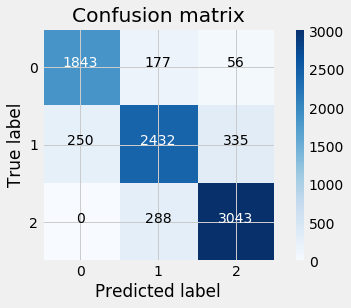

In [215]:
cm = confusion_matrix(y_test,rf_base_pred, labels=[0,1,2])
plt.savefig(f'{imageDir}/{model_name}_cm.png', dpi=300)
plot_confusion_matrix(cm,classes=[0,1,2])

In [216]:
#print classification report table
n_classes=3
targetNames = ["Class{}".format(i) for i in range(n_classes)]
print(f'\n{classification_report(y_test, rf_base_pred, target_names=targetNames)}')


              precision    recall  f1-score   support

      Class0       0.88      0.89      0.88      2076
      Class1       0.84      0.81      0.82      3017
      Class2       0.89      0.91      0.90      3331

   micro avg       0.87      0.87      0.87      8424
   macro avg       0.87      0.87      0.87      8424
weighted avg       0.87      0.87      0.87      8424



INFO:file_logger:                 feature  importance
1                ZipCode    0.961918
0                   Date    0.008418
7       log_Population_f    0.008186
8    House_Hold_Income_f    0.007558
9           Employment_f    0.007557
3    log_Interest_Rate_f    0.002031
2    log_CPI_Index_Avg_f    0.001115
5        log_Inflation_f    0.001005
4   log_Bond_Yeild_10y_f    0.000770
10       Cash_Surp_Def_f    0.000725


<Figure size 432x288 with 0 Axes>

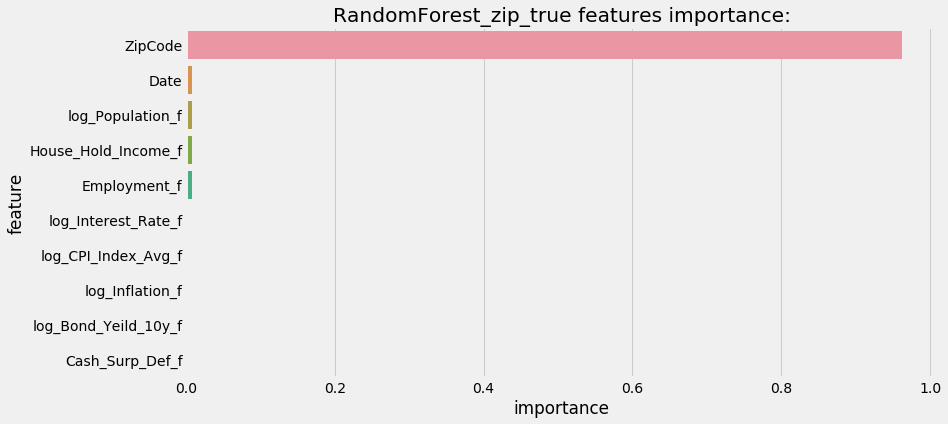

In [217]:
# Decision Tree - Feature importance
plt.savefig(f'{imageDir}/{model_name}_fimp.png', dpi=300)
rt.plot_feature_importances(features, rf_base, model_name, logger)

# 5. Naive Bayes
**-------------------------------------------------------------------------------------------------**  
Python Package: SciKit-Learn [Gaussian Naive Bayes](https://scikit-learn.org/stable/modules/naive_bayes.html#gaussian-naive-bayes)  
*Build a naïve Bayes model. Tune the parameters, such as the discretization options, to compare results.*    


## 5.1 Analysis - Naive Bayes 

In [218]:
logger.debug(f'X_train shape: {X_train.shape} |  X_val shape: {X_val.shape} | X_test shape: {X_test.shape}')
logger.debug(f'y_train shape: {y_train.shape} |  y_val shape: {y_val.shape} | y_test shape: {y_test.shape}')

## 5.2 Exploration - Naive Bayes 

## 5.3 Model - Naive Bayes 
* priors: None (default)

In [219]:
def build_nb(priors):
    nb = GaussianNB(priors=None, var_smoothing=1e-09)
    
    return nb

In [222]:
# MODEL BUILD - Naive Bayes

with_zip = 'zip_true'
model_name = f'NaiveBayes_{with_zip}'

gnb = build_nb(None)
t = 0.0
with elapsed_timer() as elapsed:
    # fit the GNB to the training data
    gnb.fit(X_train, y_train)
    t = elapsed()
    logger.info(f'GNB Model Build Time: [{t}]')

modelsPerformance['ModelName'].append(model_name)
modelsPerformance['FitTime'].append(t)

INFO:file_logger:GNB Model Build Time: [0.08762639999986277]


In [223]:
# Model Output to kaggel training dataset split into training/testing
t = 0.0
gnb_score = 0.0
with elapsed_timer() as elapsed:
    gnb_score = gnb.score(X_val, y_val)
    t = elapsed()
    logger.info(f'GNB Fit Score: [{gnb_score}]')
    logger.info(f'GNB Score Time: [{t}]')

modelsPerformance['TestAccuracyScore'].append(gnb_score)
modelsPerformance['ScoreTime'].append(t)

INFO:file_logger:GNB Fit Score: [0.38724270527030086]
INFO:file_logger:GNB Score Time: [0.049470199999632314]


In [224]:
%%time
# predictions of test set split from training set
t = 0.0
with elapsed_timer() as elapsed:
    gnb_pred = gnb.predict(X_test)
    t = elapsed()
    logger.info(f'GNB Model Predict Time: [{t}]')

modelsPerformance['PredictTime'].append(t)

INFO:file_logger:GNB Model Predict Time: [0.007201399999757996]


Wall time: 8.98 ms


## 5.4 Results

INFO:file_logger:Percent Accurately Labeled: [-5092.0]


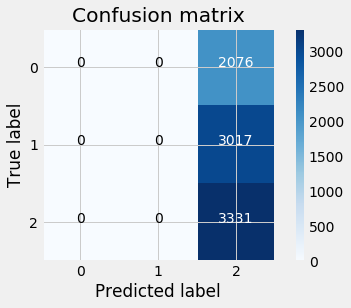

In [225]:
misLabeled = (y_test != gnb_pred).sum()/X_test.shape[0]
nbAccuractelyLabeled = 1-misLabeled

#logger.info(f'Total Number of points: [{X_test.shape[0]}]  Mislabeled Points: [{(X_test != gnb_pred).sum()}]')
#logger.info(f'Percent Mislabeled: [{((X_val != gnb_pred).sum()/X_test.shape[0])}]')
logger.info(f'Percent Accurately Labeled: [{nbAccuractelyLabeled}]')
modelsPerformance['PredictAccuracyScore'].append(nbAccuractelyLabeled)
    
# confusion matrix evaluation
cm = confusion_matrix(y_test,gnb_pred, labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

In [226]:
#print classification report table
n_classes=3
targetNames = ["Class{}".format(i) for i in range(n_classes)]
print(f'\n{classification_report(y_test, gnb_pred, target_names=targetNames)}')


              precision    recall  f1-score   support

      Class0       0.00      0.00      0.00      2076
      Class1       0.00      0.00      0.00      3017
      Class2       0.40      1.00      0.57      3331

   micro avg       0.40      0.40      0.40      8424
   macro avg       0.13      0.33      0.19      8424
weighted avg       0.16      0.40      0.22      8424



# 6. Support Vector Classification - SVMs
**-------------------------------------------------------------------------------------------------**   
Python Package: scikit-learn v0.21.3 [sklearn.svm.SVC](https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVC.html#sklearn.svm.SVC)  

## 6.1 Analysis

In [227]:
logger.debug(f'X_train shape: {X_train.shape} |  X_val shape: {X_val.shape} | X_test shape: {X_test.shape}')
logger.debug(f'y_train shape: {y_train.shape} |  y_val shape: {y_val.shape} | y_test shape: {y_test.shape}')


In [228]:
y_train = np.ravel(y_train)
y_val = np.ravel(y_val)
y_test = np.ravel(y_test)

In [229]:
logger.debug(f'X_train shape: {X_train.shape} |  X_val shape: {X_val.shape} | X_test shape: {X_test.shape}')
logger.debug(f'y_train shape: {y_train.shape} |  y_val shape: {y_val.shape} | y_test shape: {y_test.shape}')


## 6.2 Exploration

In [251]:
# one hot encoding
#lbe = LabelEncoder()
#y_train = lbe.fit_transform(y_train).astype('int32')
#y_val = lbe.fit_transform(y_val).astype('int32')
#y_test = lbe.fit_transform(y_val).astype('int32')

## 6.3 Model - SVM
* Three rounds with different kernel's being evaluated
    * 1st: rbf
        * Results:
            * Class1 - Best f1-score of .53
                <div>![image.png](attachment:image.png)</div>
    * 2nd: poly
        * Results:
            * Class2 - Best f1-score of .57
                <div>![image.png](attachment:image.png)</div>
    * 3rd: sigmoid
        * Results:
            * Class1 - Best f1-score of .53
                <div>![image.png](attachment:image.png)</div>

In [230]:
def build_svc(kernel,verbose=True):
    # base SVC model
    svc_base = SVC(C=1.0,                         # Penalty parameter C of the error term.
                   cache_size=200,                # Specify the size of the kernel cache (in MB).
                   class_weight=None,             # Set the parameter C of class i to class_weight[i]*C for SVC. If not given, all classes are supposed to have weight one. The “balanced” mode uses the values of y to automatically adjust weights inversely proportional to class frequencies in the input data as n_samples / (n_classes * np.bincount(y))
                   coef0=0.0,                     # Independent term in kernel function. It is only significant in ‘poly’ and ‘sigmoid’.
                   decision_function_shape='ovr', # Whether to return a one-vs-rest (‘ovr’) decision function of shape (n_samples, n_classes) as all other classifiers, or the original one-vs-one (‘ovo’) decision function of libsvm which has shape (n_samples, n_classes * (n_classes - 1) / 2). However, one-vs-one (‘ovo’) is always used as multi-class strategy.
                   degree=3,                      # Degree of the polynomial kernel function (‘poly’). Ignored by all other kernels.
                   gamma='auto',                  # Kernel coefficient for ‘rbf’, ‘poly’ and ‘sigmoid’. Current default is ‘auto’ which uses 1 / n_features, if gamma='scale' is passed then it uses 1 / (n_features * X.var()) as value of gamma.
                   kernel=kernel,                 # Specifies the kernel type to be used in the algorithm. It must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’ or a callable.
                   max_iter=-1,                   # Hard limit on iterations within solver, or -1 for no limit.
                   probability=False,             # Whether to enable probability estimates. This must be enabled prior to calling fit, and will slow down that method.
                   random_state=None,             # The seed of the pseudo random number generator used when shuffling the data for probability estimates. If int, random_state is the seed used by the random number generator; If RandomState instance, random_state is the random number generator; If None, the random number generator is the RandomState instance used by np.random.
                   shrinking=True,                # Whether to use the shrinking heuristic.
                   tol=0.001,                     # Tolerance for stopping criterion.
                   verbose=verbose                # Enable verbose output. Note that this setting takes advantage of a per-process runtime setting in libsvm that, if enabled, may not work properly in a multithreaded context.
                  )
    return svc_base

In [245]:
kernel = 'sigmoid' # must be one of ‘linear’, ‘poly’, ‘rbf’, ‘sigmoid’, ‘precomputed’
with_zip = 'zip_false'
model_name = f'SupportVector_{kernel}_{with_zip}'

svc = build_svc(kernel,verbose=True)
t = 0.0
with elapsed_timer() as elapsed:
    # fit the svc to the training data
    svc_fit = svc.fit(X_train, y_train)
    t = elapsed()
    logger.info(f'SupportVectorClassifier Model {model_name} Build Time: [{t}]')

modelsPerformance['ModelName'].append(model_name)
modelsPerformance['FitTime'].append(t)

[LibSVM]

INFO:file_logger:SupportVectorClassifier Model SupportVector_sigmoid_zip_false Build Time: [89.3771115999989]


In [246]:
# Score the svc model
t = 0.0
with rt.elapsed_timer() as elapsed:
    svc_score =  svc.score(X_val, y_val)
    t = elapsed()
    logger.info(f'Support Vector Classification Model {model_name} Fit Score: {[svc_score]}')
    logger.info(f'Support Vector Classification Model {model_name} Fit Score Time: [{t}]')

modelsPerformance['TestAccuracyScore'].append(svc_score)
modelsPerformance['ScoreTime'].append(t)



INFO:file_logger:Support Vector Classification Model SupportVector_sigmoid_zip_false Fit Score: [0.3864133303174244]
INFO:file_logger:Support Vector Classification Model SupportVector_sigmoid_zip_false Fit Score Time: [25.591142700001]


In [247]:
#%%time
# predictions of test set split from training set
t = 0.0
with rt.elapsed_timer() as elapsed:
    svc_pred = svc.predict(X_test)
    t = elapsed()
    logger.info(f'Support Vector Classification {model_name} Predict Time: [{t}]')

modelsPerformance['PredictTime'].append(t)


INFO:file_logger:Support Vector Classification SupportVector_sigmoid_zip_false Predict Time: [7.811279999999897]


In [248]:
logger.debug(f'X_train shape: {X_train.shape} |  X_val shape: {X_val.shape} | X_test shape: {X_test.shape}')
logger.debug(f'y_train shape: {y_train.shape} |  y_val shape: {y_val.shape} | y_test shape: {y_test.shape}')


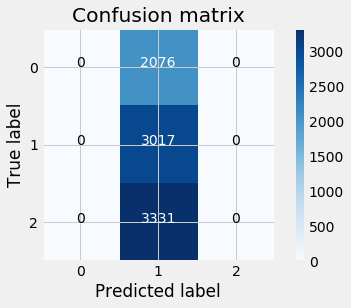

In [249]:
#misLabeled = (y_test != svc_pred).sum()/X_test.shape[0]
#nbAccuractelyLabeled = 1-misLabeled

#logger.info(f'Total Number of points: [{X_test.shape[0]}]  Mislabeled Points: [{(X_test != gnb_pred).sum()}]')
#logger.info(f'Percent Mislabeled: [{((X_val != gnb_pred).sum()/X_test.shape[0])}]')
#logger.info(f'Percent Accurately Labeled: [{nbAccuractelyLabeled}]')
#modelsPerformance['PredictAccuracyScore'].append(nbAccuractelyLabeled)
    
# confusion matrix evaluation
cm = confusion_matrix(y_test,svc_pred, labels=[0,1,2])
plot_confusion_matrix(cm,classes=[0,1,2])

In [250]:
#print classification report table
n_classes=3
targetNames = ["Class{}".format(i) for i in range(n_classes)]
print(f'\n{classification_report(y_test, svc_pred, target_names=targetNames)}')


              precision    recall  f1-score   support

      Class0       0.00      0.00      0.00      2076
      Class1       0.36      1.00      0.53      3017
      Class2       0.00      0.00      0.00      3331

   micro avg       0.36      0.36      0.36      8424
   macro avg       0.12      0.33      0.18      8424
weighted avg       0.13      0.36      0.19      8424



## 6.4 Results

In [252]:
#pd.DataFrame(modelsPerformance)
modelsPerformance

{'ModelName': ['DecisionTree_None_2_zip_true',
  'RandomForest_zip_true',
  'NaiveBayes_zip_false',
  'NaiveBayes_zip_true',
  'SupportVector_rbf_zip_false',
  'SupportVector_poly_zip_false',
  'SupportVector_sigmoid_zip_false'],
 'TestAccuracyScore': [0.9914423584407751,
  0.6437080600165875,
  0.38724270527030086,
  0.38724270527030086,
  0.5570383774410013,
  0.36454799065068233,
  0.36454799065068233,
  0.3864133303174244],
 'PredictAccuracyScore': [-5092.0],
 'FitTime': [0.3555843000012828,
  7.046673699998792,
  0.08719380000002275,
  0.08762639999986277,
  284.62899259999904,
  0.10550850000072387,
  89.3771115999989],
 'ScoreTime': [0.04137609999997949,
  0.9830512999997154,
  0.0912466999998287,
  0.049470199999632314,
  95.96742810000069,
  0.045794699999532895,
  0.04900169999928039,
  25.591142700001],
 'PredictTime': [0.003885100000843522,
  0.1275378999998793,
  0.007201399999757996,
  29.593625200001043,
  0.009665300000051502,
  7.811279999999897]}

# 8. Final Results & Conclusion
**-------------------------------------------------------------------------------------------------**

Real estate housing market trends are impacted by many factors that require deep data mining techniques and domain experts to pull the right data together and engineer it in meaningful ways to gain insights into this industry. Data proved to be the most challening component of this research. There is a lack of quality datasets that are easily found which inhibits possible discoveries. 

Certainly economic indicators are present that signal swings in price trends... Further research on comprehensive, state level economics is needed to expand on the datasets used in this study, which were at the national level. Most likely it's this that caused the inconsistencies with the models performance. The Real estate data being focused on was at the state level, whereas the economic data was at the national yearly average. This abstraction could have been a leading cause.

In [257]:
# for report auto generation
# testing markup report generation
from nbconvert import HTMLExporter
import codecs
import os
import datetime

stamp = datetime.date.today().strftime("%m-%d-%Y")
exporter = HTMLExporter(template_file='report.tpl')
output, resources = exporter.from_filename('ist707_prj.ipynb')
new_fnw = 'Ryan_Timbrook_Project_Report_.html'
codecs.open(new_fnw, 'w',encoding='utf-8').write(output)